In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Datasets/Glassdoor companies review dataset.csv')

In [4]:
df

timestamp       id                                            company  \
0    2023-11-01  1311218                                        Brightlands   
1    2023-12-14  3097968  Ordine dei Medici Chirurghi e Odontoiatri Prov...   
2    2023-11-01  4310888                                      F&C Engineers   
3    2023-10-31  3034737                                 Minuteman Mortgage   
4    2023-11-01  1385015                                   Fathom Computing   
..          ...      ...                                                ...   
995  2023-11-01  1438594                                              Timuz   
996  2023-11-01  1550280                                      Midwest Arbor   
997  2023-11-01   253909                      HintonBurdick CPAs & Advisors   
998  2023-11-02   782441    Orthopedic & Sports Physical Therapy Associates   
999  2023-11-01   924849                                              A.Hak   

     ratings_overall           details_size  details_founded  \
0                3.8    51 to 200 Employees              NaN   
1                4.0                Unknown              NaN   
2                4.0    51 to 200 Employees           2004.0   
3                4.1      1 to 50 Employees           2018.0   
4                5.0      1 to 50 Employees              NaN   
..               ...                    ...              ...   
995              4.4    51 to 200 Employees              NaN   
996              2.0    51 to 200 Employees           1993.0   
997              4.8    51 to 200 Employees           1975.0   
998              4.3    51 to 200 Employees              NaN   
999              4.0  501 to 1000 Employees           1963.0   

                details_type country_code company_type  \
0          Company - Private           NL      Private   
1           Company - Public           IT       Public   
2          Company - Private           US      Private   
3                    Unknown           IN        Other   
4          Company - Private           US      Private   
..                       ...          ...          ...   
995        Company - Private           IN      Private   
996        Company - Private           US      Private   
997  Private Practice / Firm           US      Private   
998        Company - Private           US      Private   
999        Company - Private           NL      Private   

                                              url_jobs  ...  \
0    https://www.glassdoor.com/Jobs/Brightlands-Job...  ...   
1    https://www.glassdoor.com/Jobs/Ordine-dei-Medi...  ...   
2    https://www.glassdoor.com/Jobs/F-and-C-Enginee...  ...   
3    https://www.glassdoor.com/Jobs/Minuteman-Mortg...  ...   
4    https://www.glassdoor.com/Jobs/Fathom-Computin...  ...   
..                                                 ...  ...   
995  https://www.glassdoor.com/Jobs/Timuz-Jobs-E143...  ...   
996  https://www.glassdoor.com/Jobs/Midwest-Arbor-J...  ...   
997  https://www.glassdoor.com/Jobs/HintonBurdick-C...  ...   
998  https://www.glassdoor.com/Jobs/Orthopedic-and-...  ...   
999  https://www.glassdoor.com/Jobs/A-Hak-Jobs-E924...  ...   

    interview_difficulty interviews_count benefits_count jobs_count  \
0                    NaN                0            4.0          0   
1                    3.0                1            NaN          0   
2                    NaN                0            2.0          1   
3                    NaN                0            NaN          0   
4                    2.0                1            NaN          0   
..                   ...              ...            ...        ...   
995                  3.0                1            5.0          0   
996                  2.0                1            NaN          0   
997                  3.5                3            4.0          0   
998                  NaN                0            NaN          3   
999                  2.3                3            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   timestamp                          1000 non-null   object 
 1   id                                 1000 non-null   int64  
 2   company                            1000 non-null   object 
 3   ratings_overall                    1000 non-null   float64
 4   details_size                       1000 non-null   object 
 5   details_founded                    454 non-null    float64
 6   details_type                       1000 non-null   object 
 7   country_code                       994 non-null    object 
 8   company_type                       1000 non-null   object 
 9   url_jobs                           1000 non-null   object 
 10  url_overview                       1000 non-null   object 
 11  url_reviews                        1000 non-null   object

In [6]:
df.isnull().sum()

timestamp                              0
id                                     0
company                                0
ratings_overall                        0
details_size                           0
details_founded                      546
details_type                           0
country_code                           6
company_type                           0
url_jobs                               0
url_overview                           0
url_reviews                            0
benefits_url                           0
details_headquarters                   1
region                               650
details_industry                     262
details_revenue                        0
details_website                       10
interviews_url                         1
photos_url                             1
ratings_career_opportunities           0
ratings_ceo_approval                   0
ratings_ceo_approval_count             0
ratings_compensation_benefits          0
ratings_cutlure_

In [7]:
dt = df.drop(['url','photos_count','photos','url_reviews','url_overview',
         'url_jobs','photos_url','url_faq','benefits_url',
         'interviews_url','photos_url','salaries_url',
         'details_website','details_headquarters',
         'details_type','details_founded','details_size','faq'
        ],axis=1)

In [8]:
dt = dt.drop(['details_industry'],axis=1)

In [9]:
dt.region = dt.region.fillna('unknown')

In [10]:
dt.country_code = dt.country_code.fillna('unknown')

In [11]:
dt.ratings_rated_ceo = dt.ratings_rated_ceo.fillna('0.0')

In [12]:
dt.competitors = dt.competitors.fillna('unknown')

In [13]:
dt.timestamp = df.timestamp.astype('datetime64[ns]')

In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   timestamp                          1000 non-null   datetime64[ns]
 1   id                                 1000 non-null   int64         
 2   company                            1000 non-null   object        
 3   ratings_overall                    1000 non-null   float64       
 4   country_code                       1000 non-null   object        
 5   company_type                       1000 non-null   object        
 6   region                             1000 non-null   object        
 7   details_revenue                    1000 non-null   object        
 8   ratings_career_opportunities       1000 non-null   float64       
 9   ratings_ceo_approval               1000 non-null   float64       
 10  ratings_ceo_approval_count         10

In [15]:
dt.isnull().sum()

timestamp                              0
id                                     0
company                                0
ratings_overall                        0
country_code                           0
company_type                           0
region                                 0
details_revenue                        0
ratings_career_opportunities           0
ratings_ceo_approval                   0
ratings_ceo_approval_count             0
ratings_compensation_benefits          0
ratings_cutlure_values                 0
diversity_inclusion_score            508
diversity_inclusion_count             65
ratings_senior_management              0
ratings_work_life_balance              0
ratings_business_outlook               0
ratings_recommend_to_friend            0
ratings_rated_ceo                      0
competitors                            0
salaries_count                         0
career_opportunities_distribution      1
interview_difficulty                 290
interviews_count

In [16]:
dt.diversity_inclusion_score = dt.diversity_inclusion_score.fillna('0.0')
dt.diversity_inclusion_count = dt.diversity_inclusion_count.fillna('0.0')
dt.interview_difficulty = dt.interview_difficulty.fillna('0.0')
dt.benefits_count = dt.benefits_count.fillna('0.0')

## Outlayer Detection

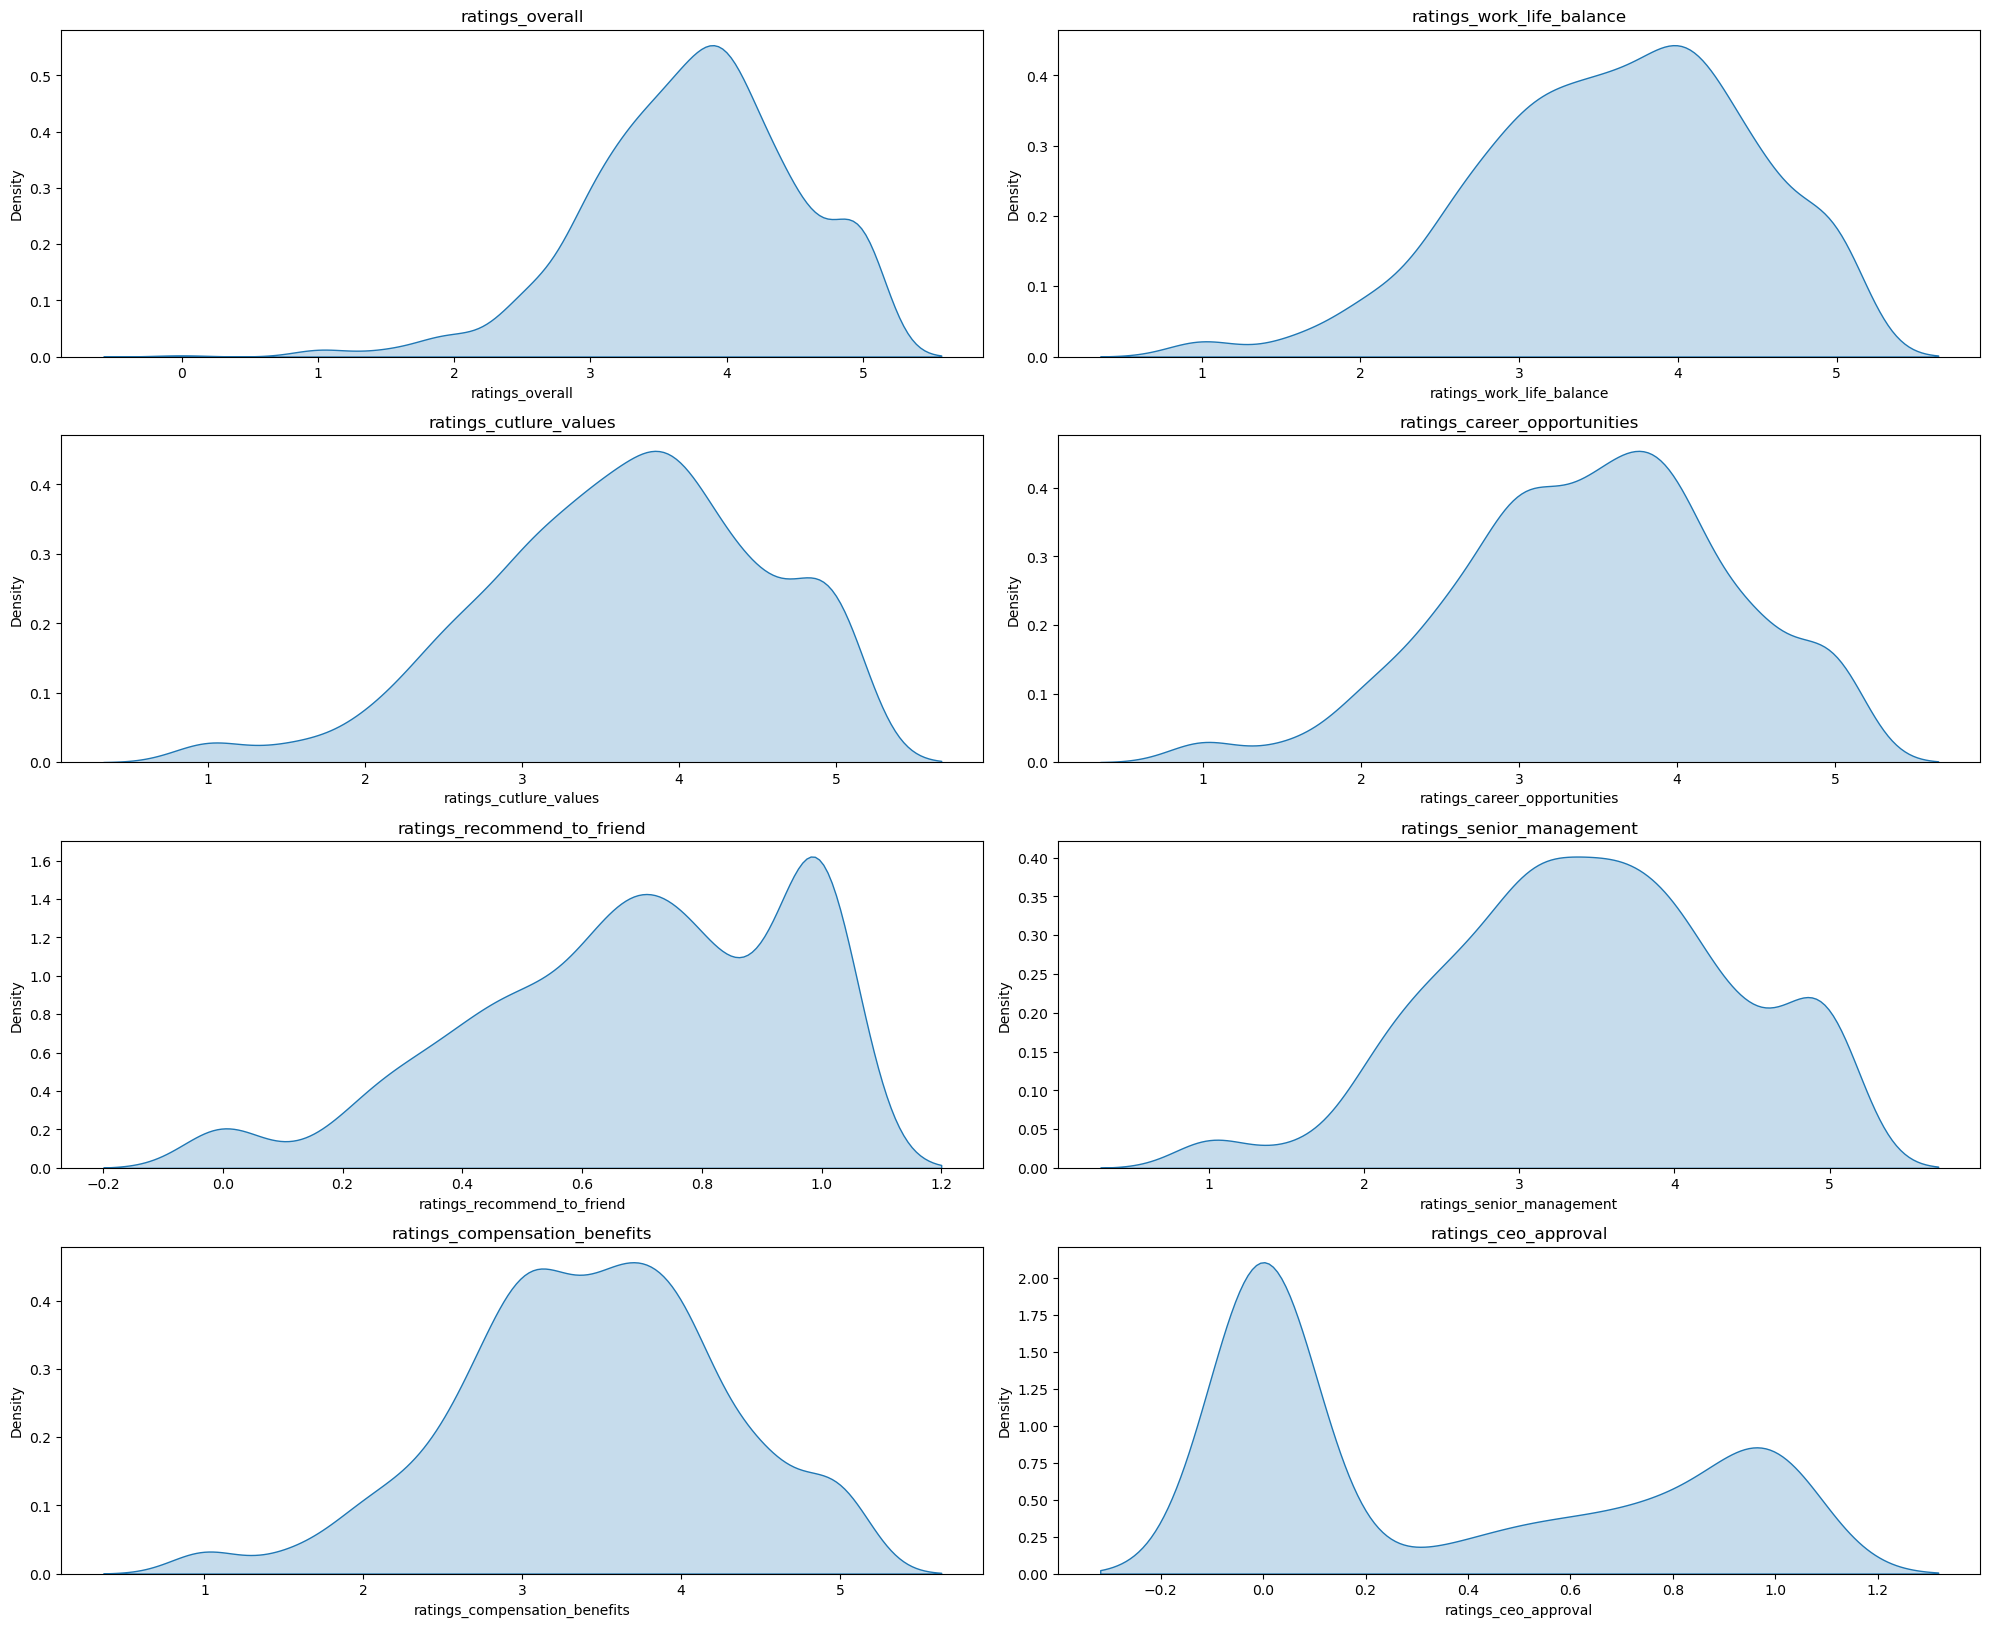

In [17]:
fig = plt.figure(figsize=[20,20])
for i, col in enumerate(['ratings_overall', 'ratings_work_life_balance', 'ratings_cutlure_values',
                  'ratings_career_opportunities','ratings_recommend_to_friend',
                  'ratings_senior_management','ratings_compensation_benefits',
                 'ratings_ceo_approval'], start=1):
    ax = fig.add_subplot(5, 2, i)  
    sb.kdeplot(x=df[col], ax=ax,shade ='green')
    ax.set_title(col)

plt.tight_layout() 
plt.show()

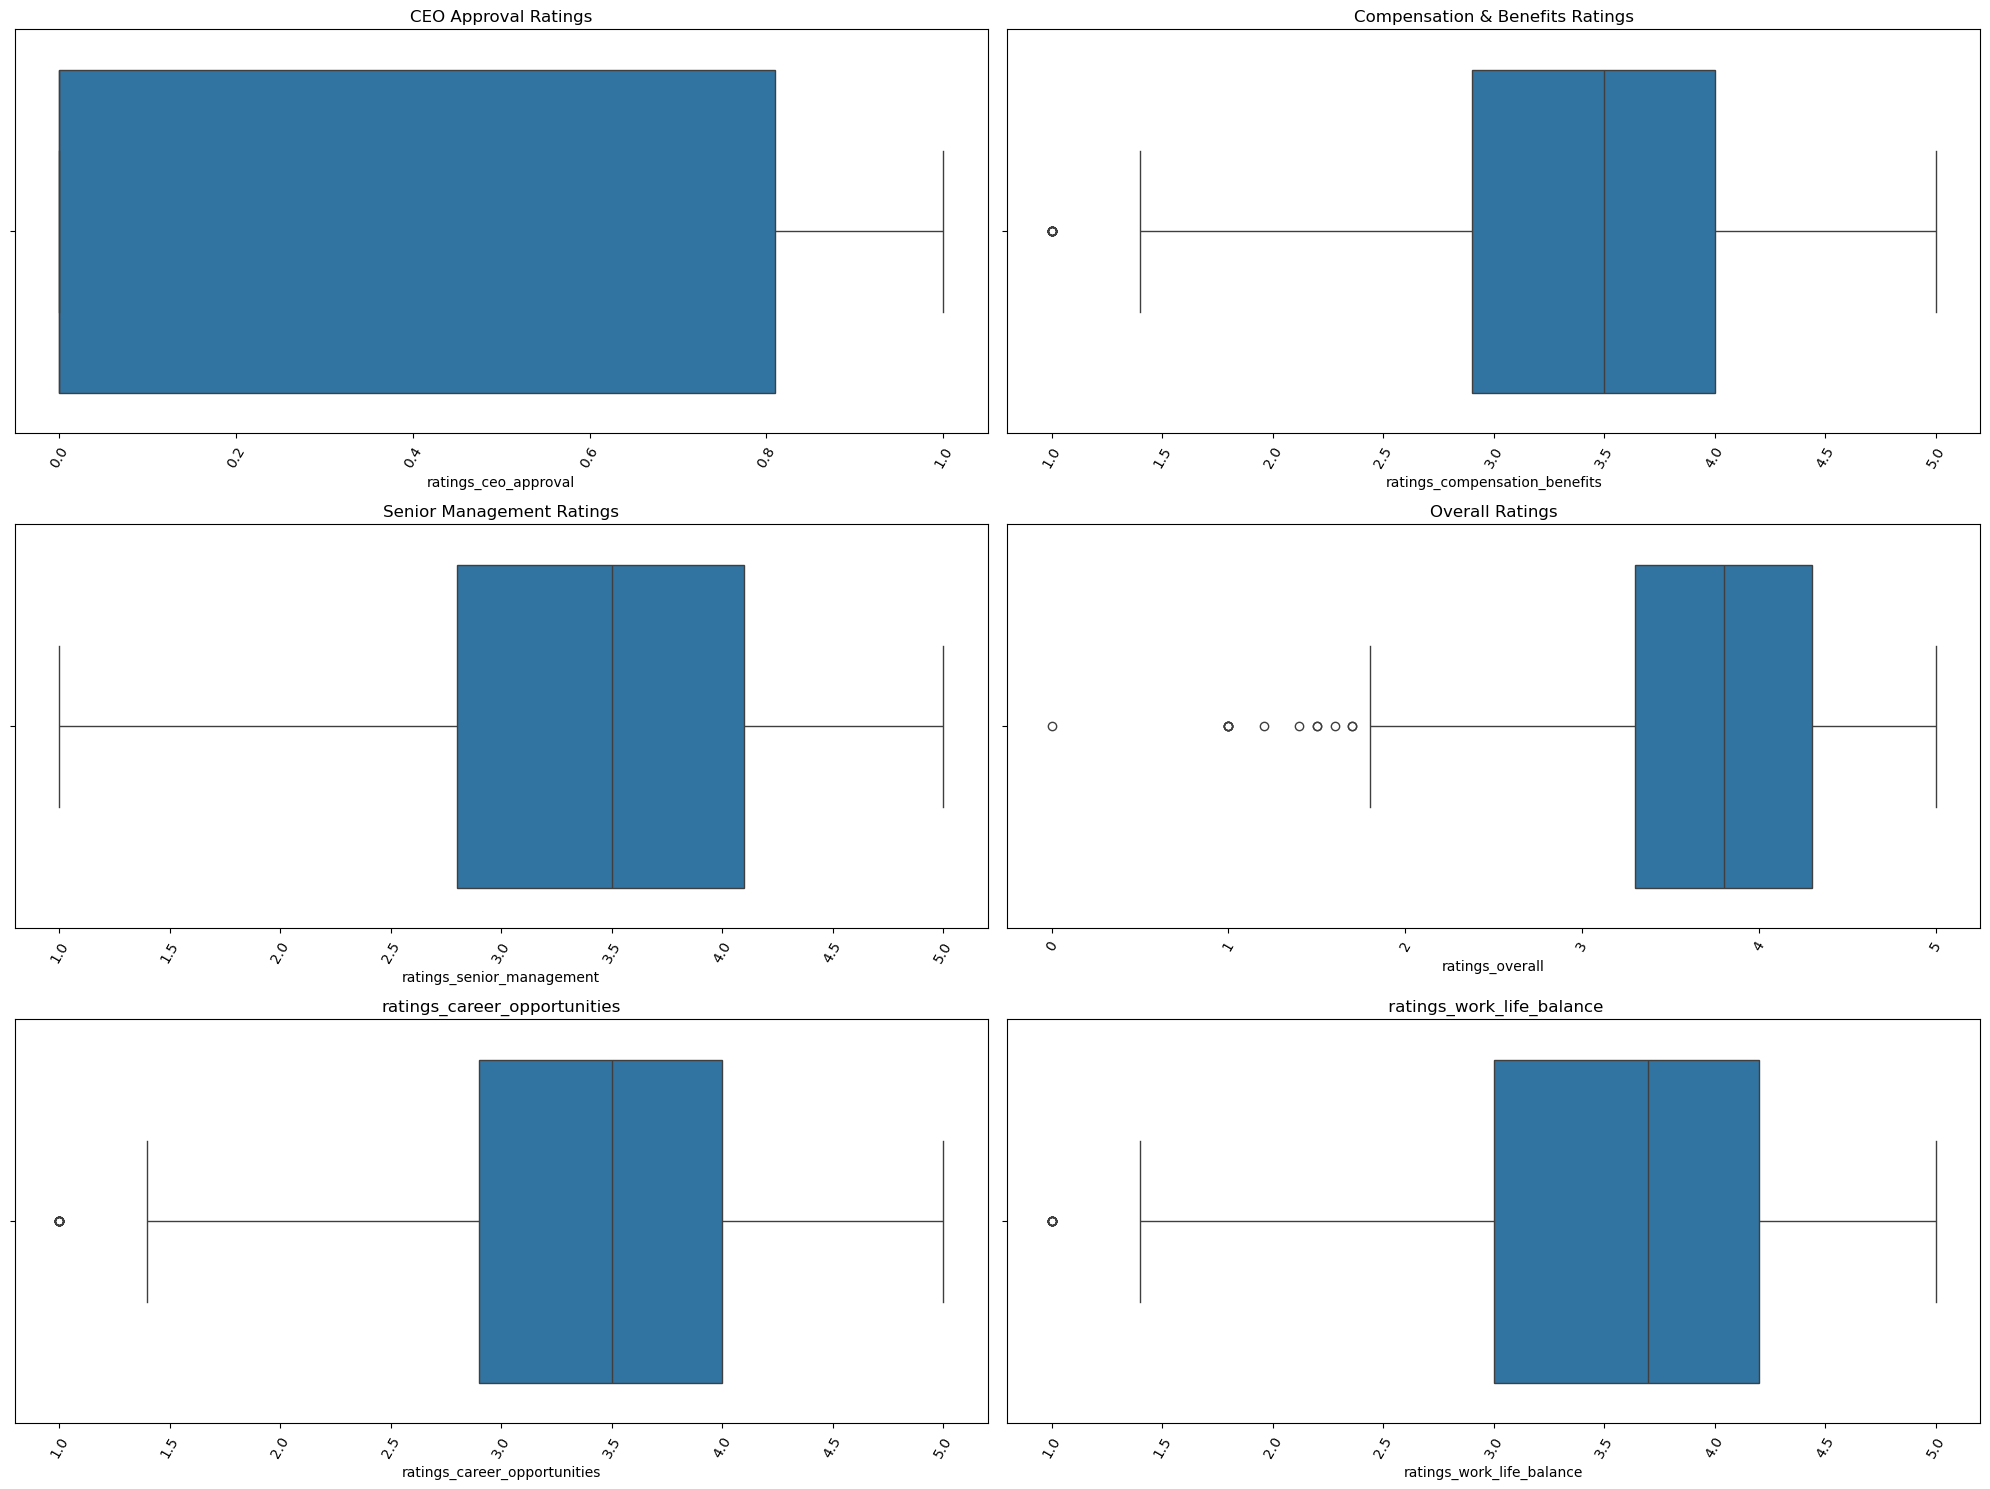

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(321)
sb.boxplot(x=df.ratings_ceo_approval)
plt.title('CEO Approval Ratings')
plt.xticks(rotation=60)

plt.subplot(322)
sb.boxplot(x=df.ratings_compensation_benefits)
plt.title('Compensation & Benefits Ratings')
plt.xticks(rotation=60)


plt.subplot(323)
sb.boxplot(x=df.ratings_senior_management)
plt.title('Senior Management Ratings')
plt.xticks(rotation=60)

plt.subplot(324)
sb.boxplot(x=df.ratings_overall)
plt.title('Overall Ratings')
plt.xticks(rotation=60)

plt.subplot(325)
sb.boxplot(x=df.ratings_career_opportunities)
plt.title('ratings_career_opportunities')
plt.xticks(rotation=60)

plt.subplot(326)
sb.boxplot(x=df.ratings_work_life_balance)
plt.title(' ratings_work_life_balance')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

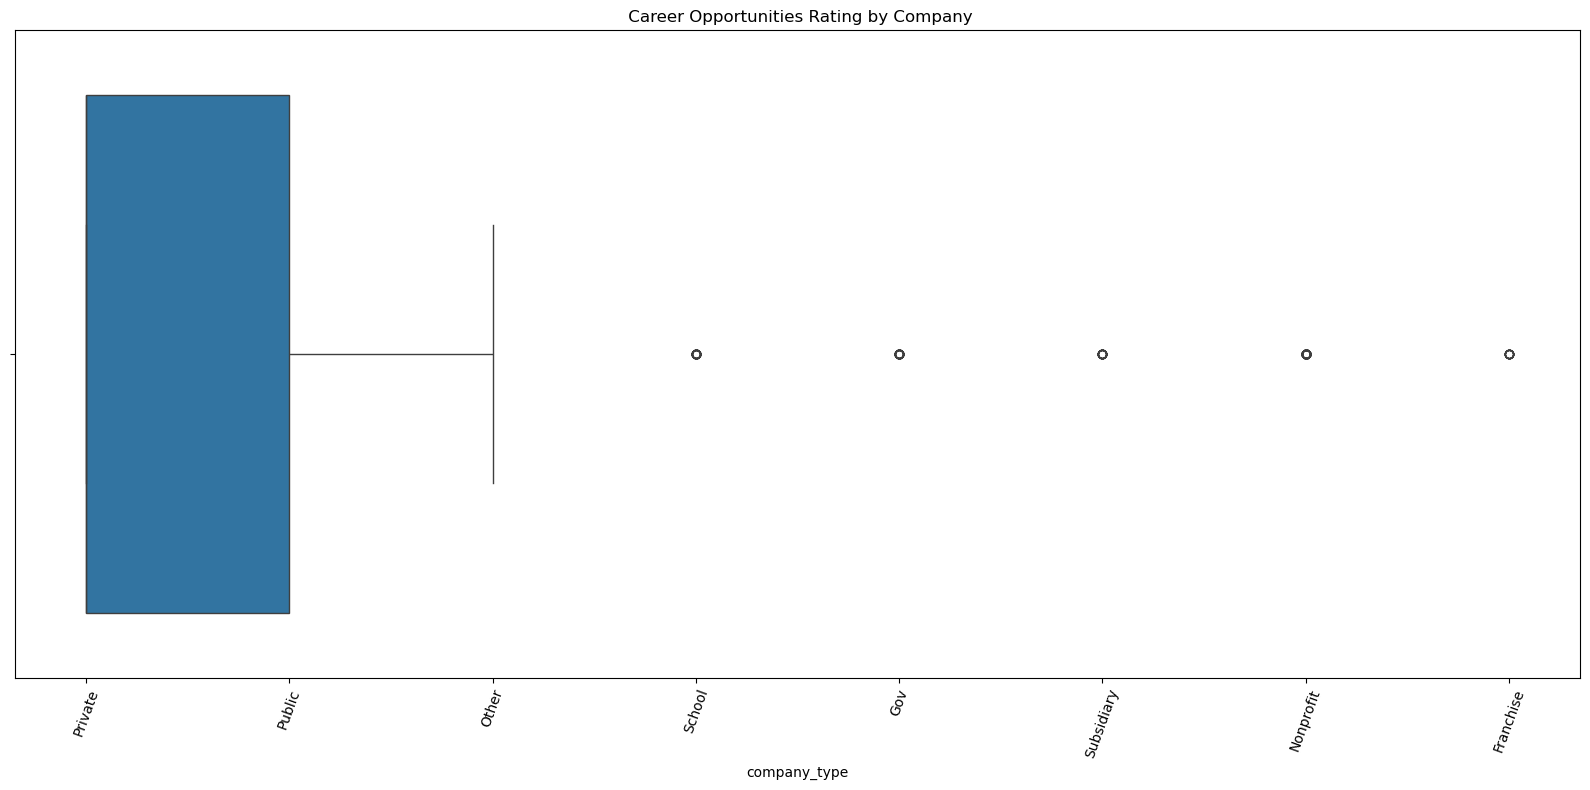

In [19]:
fig = plt.figure(figsize=(16,8))
sb.boxplot(x=dt.company_type)
plt.title(" Career Opportunities Rating by Company")
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

In [20]:
q1 = np.percentile(dt.ratings_compensation_benefits,25)
q3 = np.percentile(dt.ratings_compensation_benefits,75)
iqr = q3-q1
c1 = q1-1.5*(iqr)
c2 = q3+1.5*(iqr)
w=dt[(dt.ratings_compensation_benefits > c2)|(dt.ratings_compensation_benefits < c1)]
w = w.index

In [21]:
dt = dt.drop(labels=w)

In [22]:
q2 = np.percentile(dt.ratings_overall,25)
q4 = np.percentile(dt.ratings_overall,75)
iqr1 = q4-q2
c3 = q2-1.5*(iqr1)
c4 = q4+1.5*(iqr1)
r=dt[(dt.ratings_overall > c4)|(dt.ratings_overall < c3)]
r = r.index

In [23]:
dt = dt.drop(labels=r)

In [24]:
x1 = np.percentile(dt.ratings_career_opportunities,25)
x2 = np.percentile(dt.ratings_career_opportunities,75)
iqr0 = x2-x1
y1 = x1-1.5*(iqr0)
y2 = x2+1.5*(iqr0)
e=dt[(dt.ratings_career_opportunities > y2)|(dt.ratings_career_opportunities < y1)]
e = e.index


In [25]:
dt = dt.drop(labels=e)

In [26]:
x3 = np.percentile(dt.ratings_work_life_balance,25)
x4 = np.percentile(dt.ratings_work_life_balance,75)
iqr4 = x4-x3
y3 = x3-1.5*(iqr4)
y4 = x4+1.5*(iqr4)
s = dt[(dt.ratings_work_life_balance > y4) | (dt.ratings_work_life_balance < y3)]  
s = s.index

In [27]:
dt.company_type.unique()

array(['Private', 'Public', 'Other', 'School', 'Gov', 'Subsidiary',
       'Nonprofit', 'Franchise'], dtype=object)

In [28]:
dt = dt.drop(labels=s)

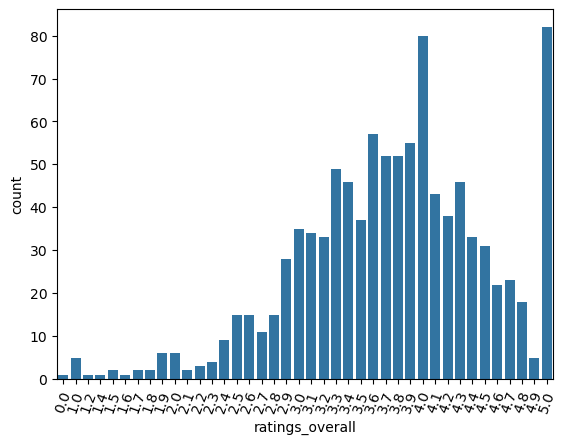

In [29]:
sb.countplot(x=df.ratings_overall)
plt.xticks(rotation=70)
plt.show()

In [30]:
dt.describe()

timestamp            id  ratings_overall  \
count                            967  9.670000e+02       967.000000   
mean   2023-11-09 17:11:58.510858240  1.804045e+06         3.807549   
min              2023-05-11 00:00:00  1.550000e+02         1.900000   
25%              2023-11-01 00:00:00  7.807395e+05         3.300000   
50%              2023-11-01 00:00:00  1.310734e+06         3.800000   
75%              2023-11-01 00:00:00  2.485038e+06         4.300000   
max              2024-01-31 00:00:00  6.311675e+06         5.000000   
std                              NaN  1.490630e+06         0.689281   

       ratings_career_opportunities  ratings_ceo_approval  \
count                    967.000000            967.000000   
mean                       3.529783              0.360734   
min                        1.500000              0.000000   
25%                        3.000000              0.000000   
50%                        3.500000              0.000000   
75%                        4.000000              0.810000   
max                        5.000000              1.000000   
std                        0.794053              0.423543   

       ratings_ceo_approval_count  ratings_compensation_benefits  \
count                  967.000000                     967.000000   
mean                    14.626680                       3.477973   
min                      0.000000                       1.400000   
25%                      0.000000                       3.000000   
50%                      0.000000                       3.500000   
75%                      5.500000                       4.000000   
max                   1197.000000                       5.000000   
std                     69.469762                       0.772456   

       ratings_cutlure_values  ratings_senior_management  \
count              967.000000                 967.000000   
mean                 3.699897                   3.507963   
min                  1.000000                   1.000000   
25%                  3.100000                   2.900000   
50%                  3.700000                   3.500000   
75%                  4.300000                   4.100000   
max                  5.000000                   5.000000   
std                  0.815412                   0.864810   

       ratings_work_life_balance  ratings_business_outlook  \
count                 967.000000                967.000000   
mean                    3.660600                  0.612275   
min                     1.600000                  0.000000   
25%                     3.100000                  0.420000   
50%                     3.700000                  0.620000   
75%                     4.200000                  0.830000   
max                     5.000000                  1.000000   
std                     0.781362                  0.286960   

       ratings_recommend_to_friend  salaries_count  interviews_count  \
count                   967.000000      967.000000        967.000000   
mean                      0.700010      106.382627         11.089969   
min                       0.000000        0.000000          0.000000   
25%                       0.520000        6.000000          0.000000   
50%                       0.720000       13.000000          1.000000   
75%                       0.930000       37.000000          4.000000   
max                       1.000000    13098.000000       1250.000000   
std                       0.246815      661.876868         67.005756   

         jobs_count  reviews_count  
count    967.000000     967.000000  
mean      48.292658      70.285419  
min        0.000000       1.000000  
25%        0.000000       5.000000  
50%        0.000000      10.000000  
75%        5.000000      27.000000  
max    11348.000000    9196.000000  
std      514.309286     458.227672

In [31]:
corr_matrix = df[['ratings_overall', 'ratings_work_life_balance', 'ratings_cutlure_values',
                  'ratings_career_opportunities','ratings_recommend_to_friend',
                  'ratings_senior_management','ratings_compensation_benefits',
                 'ratings_ceo_approval']].corr()


## Employee Satisfaction Analysis

In [32]:
corr = df.corr(numeric_only=True)

In [33]:
#plt.figure(figsize=(20,20))
#sb.heatmap(corr, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.xticks(rotation=45)
#plt.show()

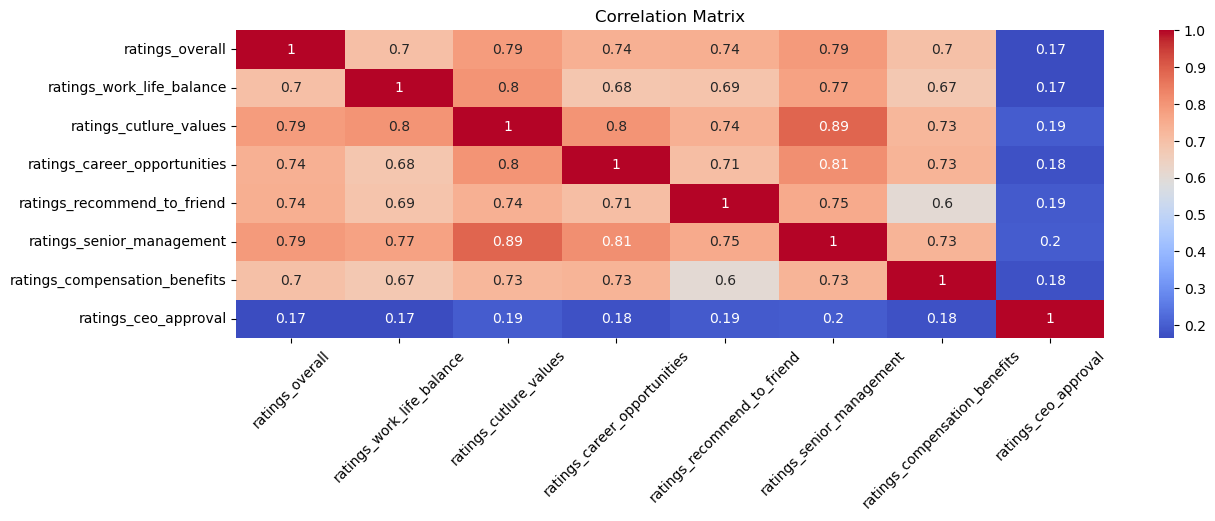

In [34]:
plt.figure(figsize=(14,4))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

In [35]:
# ['ratings_overall', 'ratings_work_life_balance', 'ratings_cutlure_values',
#'ratings_career_opportunities','ratings_recommend_to_friend',
#'ratings_senior_management','ratings_compensation_benefits',]
# This all are highly influence over overall ratting

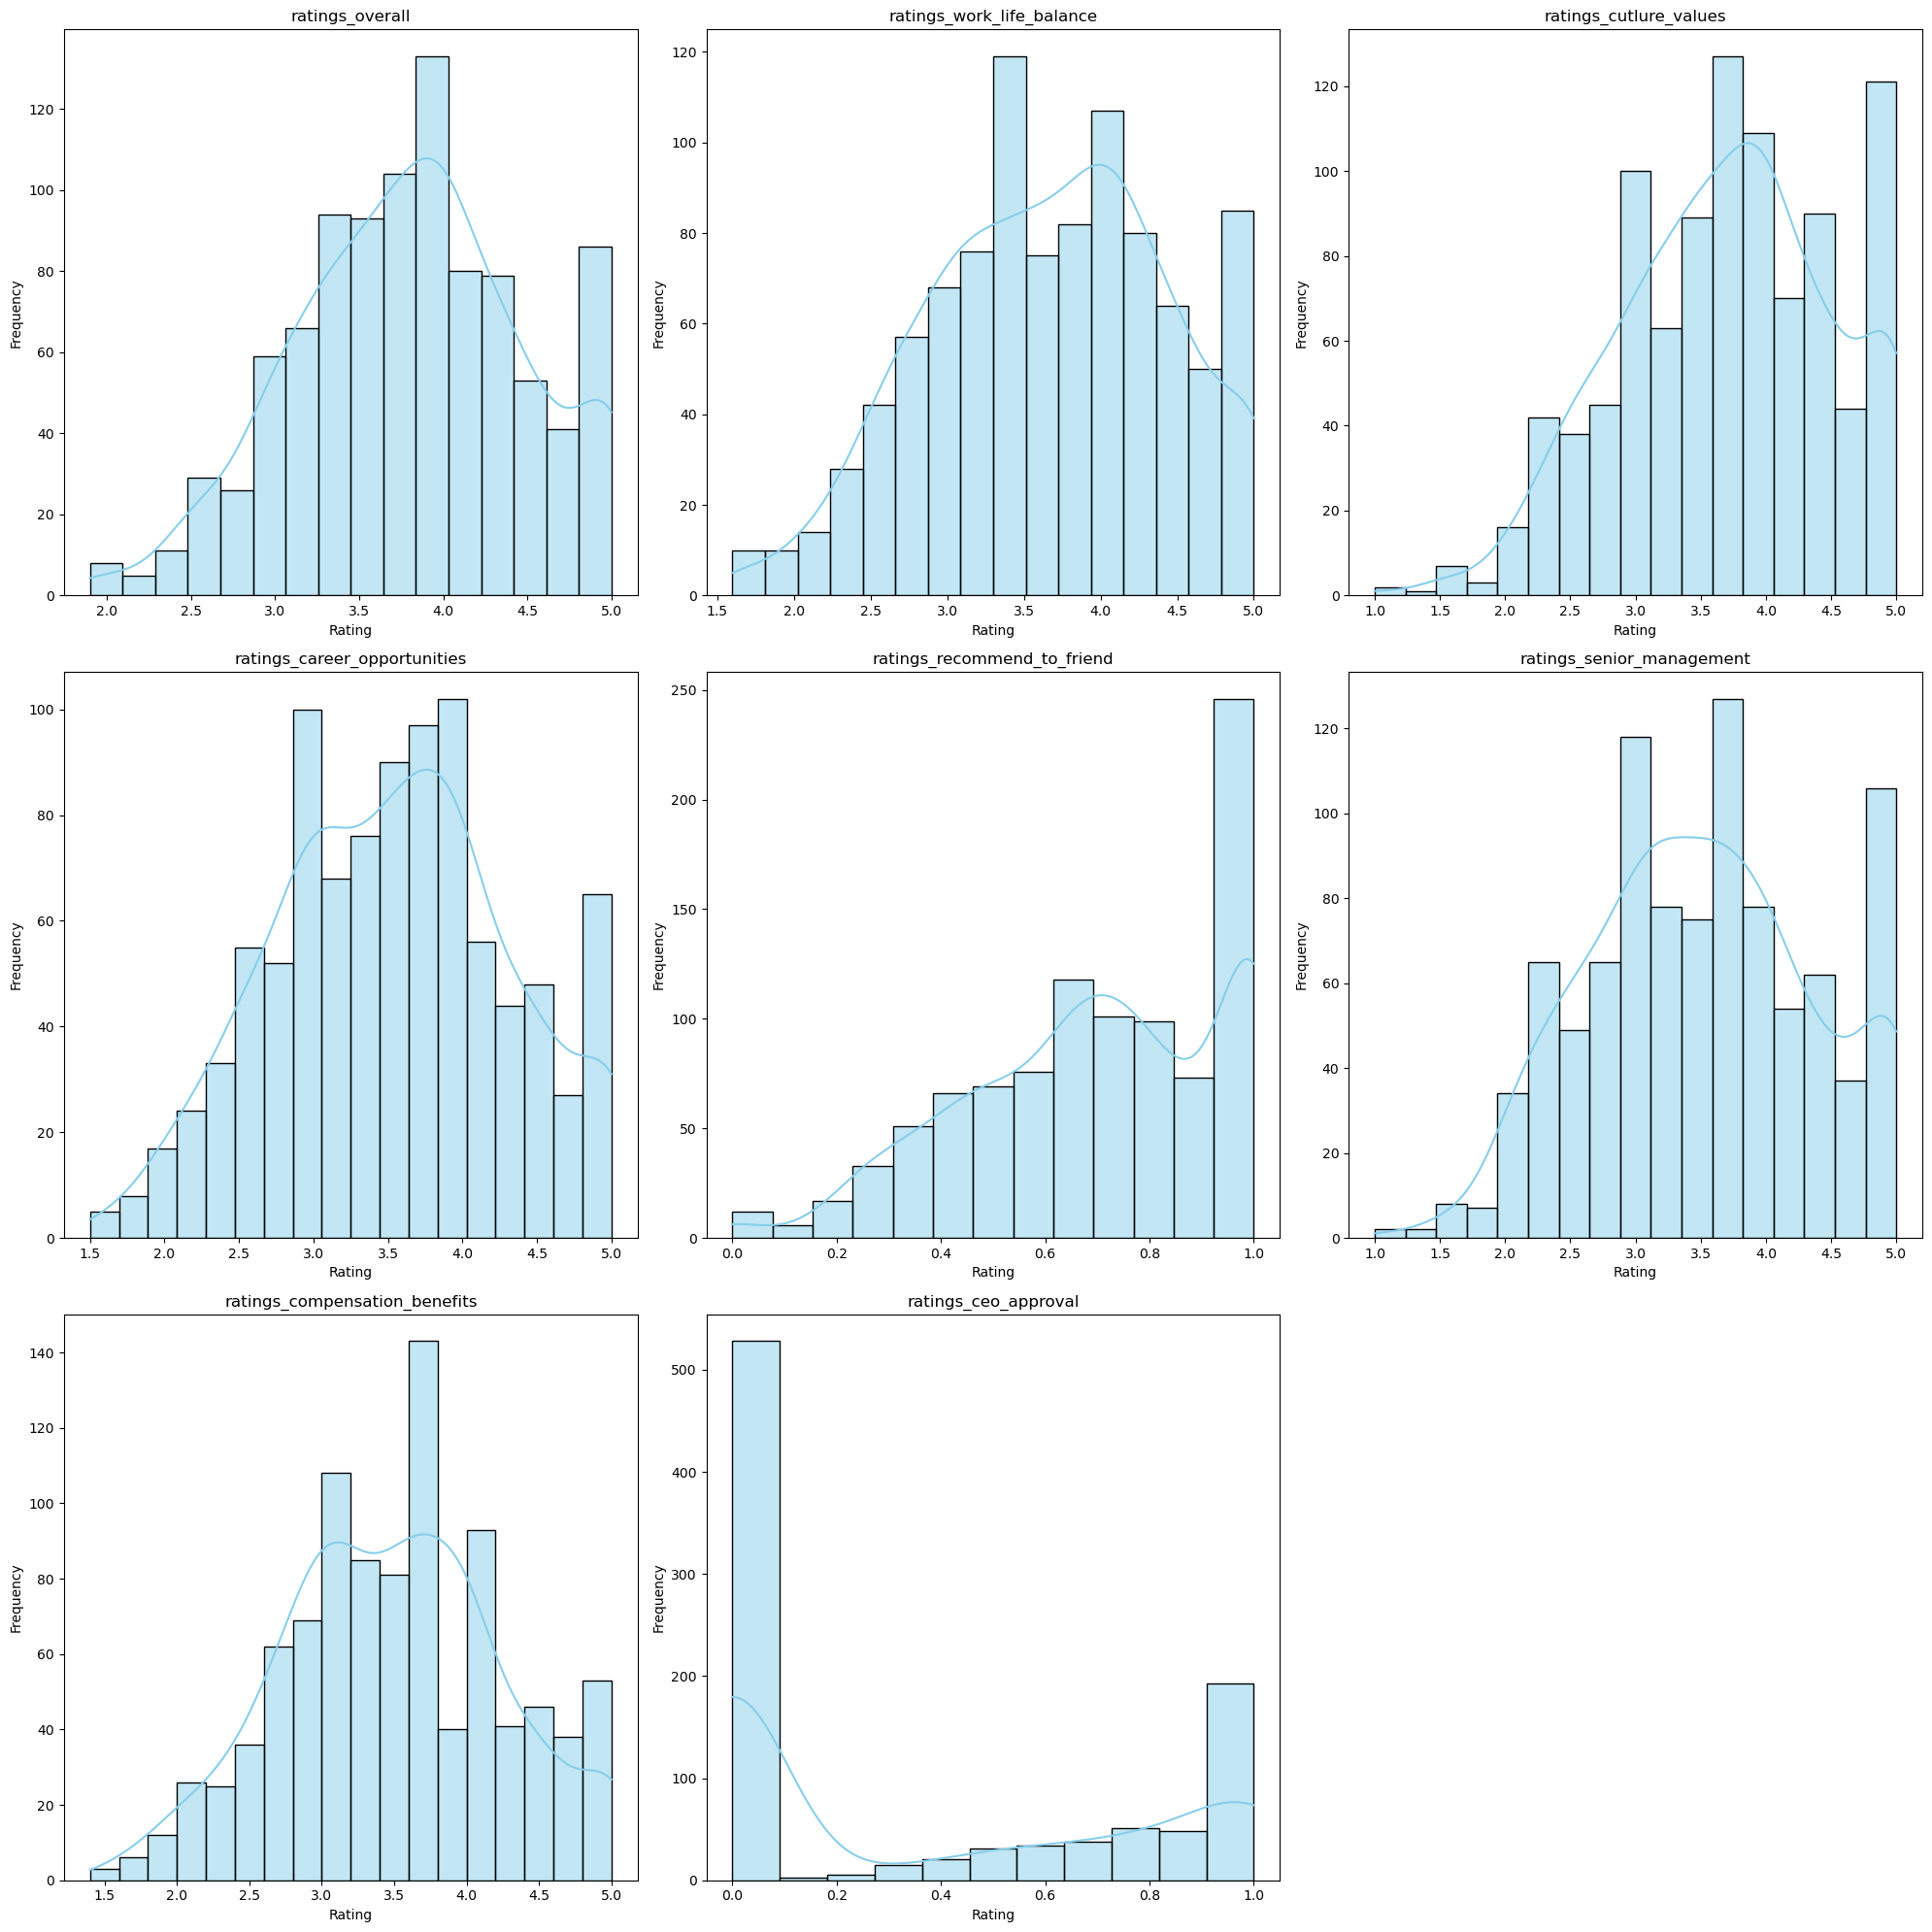

In [36]:
fig = plt.figure(figsize=(20, 20))

for i,col in enumerate(corr_matrix,start=1):
    ax = fig.add_subplot(3,3,i)
    sb.histplot(dt[col], kde=True,ax = ax,color='skyblue')
    plt.title(col)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Company Comparison

In [37]:
company_hig_rating = dt[(dt.ratings_overall >= 5)
&(dt.ratings_career_opportunities >= 4.5)
&(dt.ratings_compensation_benefits >= 4.5)
&(dt.ratings_work_life_balance >= 4.5)
&(dt.ratings_senior_management >= 4.5)
&(dt.ratings_cutlure_values >= 4.5)]

In [38]:
company_mid_rating = dt[(dt.ratings_overall <= 4)
&(dt.ratings_overall >= 3.5)
&(dt.ratings_career_opportunities <= 4)
&(dt.ratings_career_opportunities >= 3.5)

&(dt.ratings_compensation_benefits <= 4)
&(dt.ratings_compensation_benefits >= 3.5)

&(dt.ratings_work_life_balance <= 4)
&(dt.ratings_work_life_balance >= 3.5)

&(dt.ratings_senior_management <= 4)
&(dt.ratings_senior_management >= 3.5)

&(dt.ratings_cutlure_values <= 4)
&(dt.ratings_cutlure_values >= 3.5)
]

In [39]:
company_low_rating = dt[(dt.ratings_overall <= 3)
&(dt.ratings_career_opportunities <= 2.5 )


&(dt.ratings_compensation_benefits <= 2.5)

&(dt.ratings_work_life_balance <= 2.5)

&(dt.ratings_senior_management <= 2.5)

&(dt.ratings_cutlure_values <= 2.5)]

## Highly Rated Company

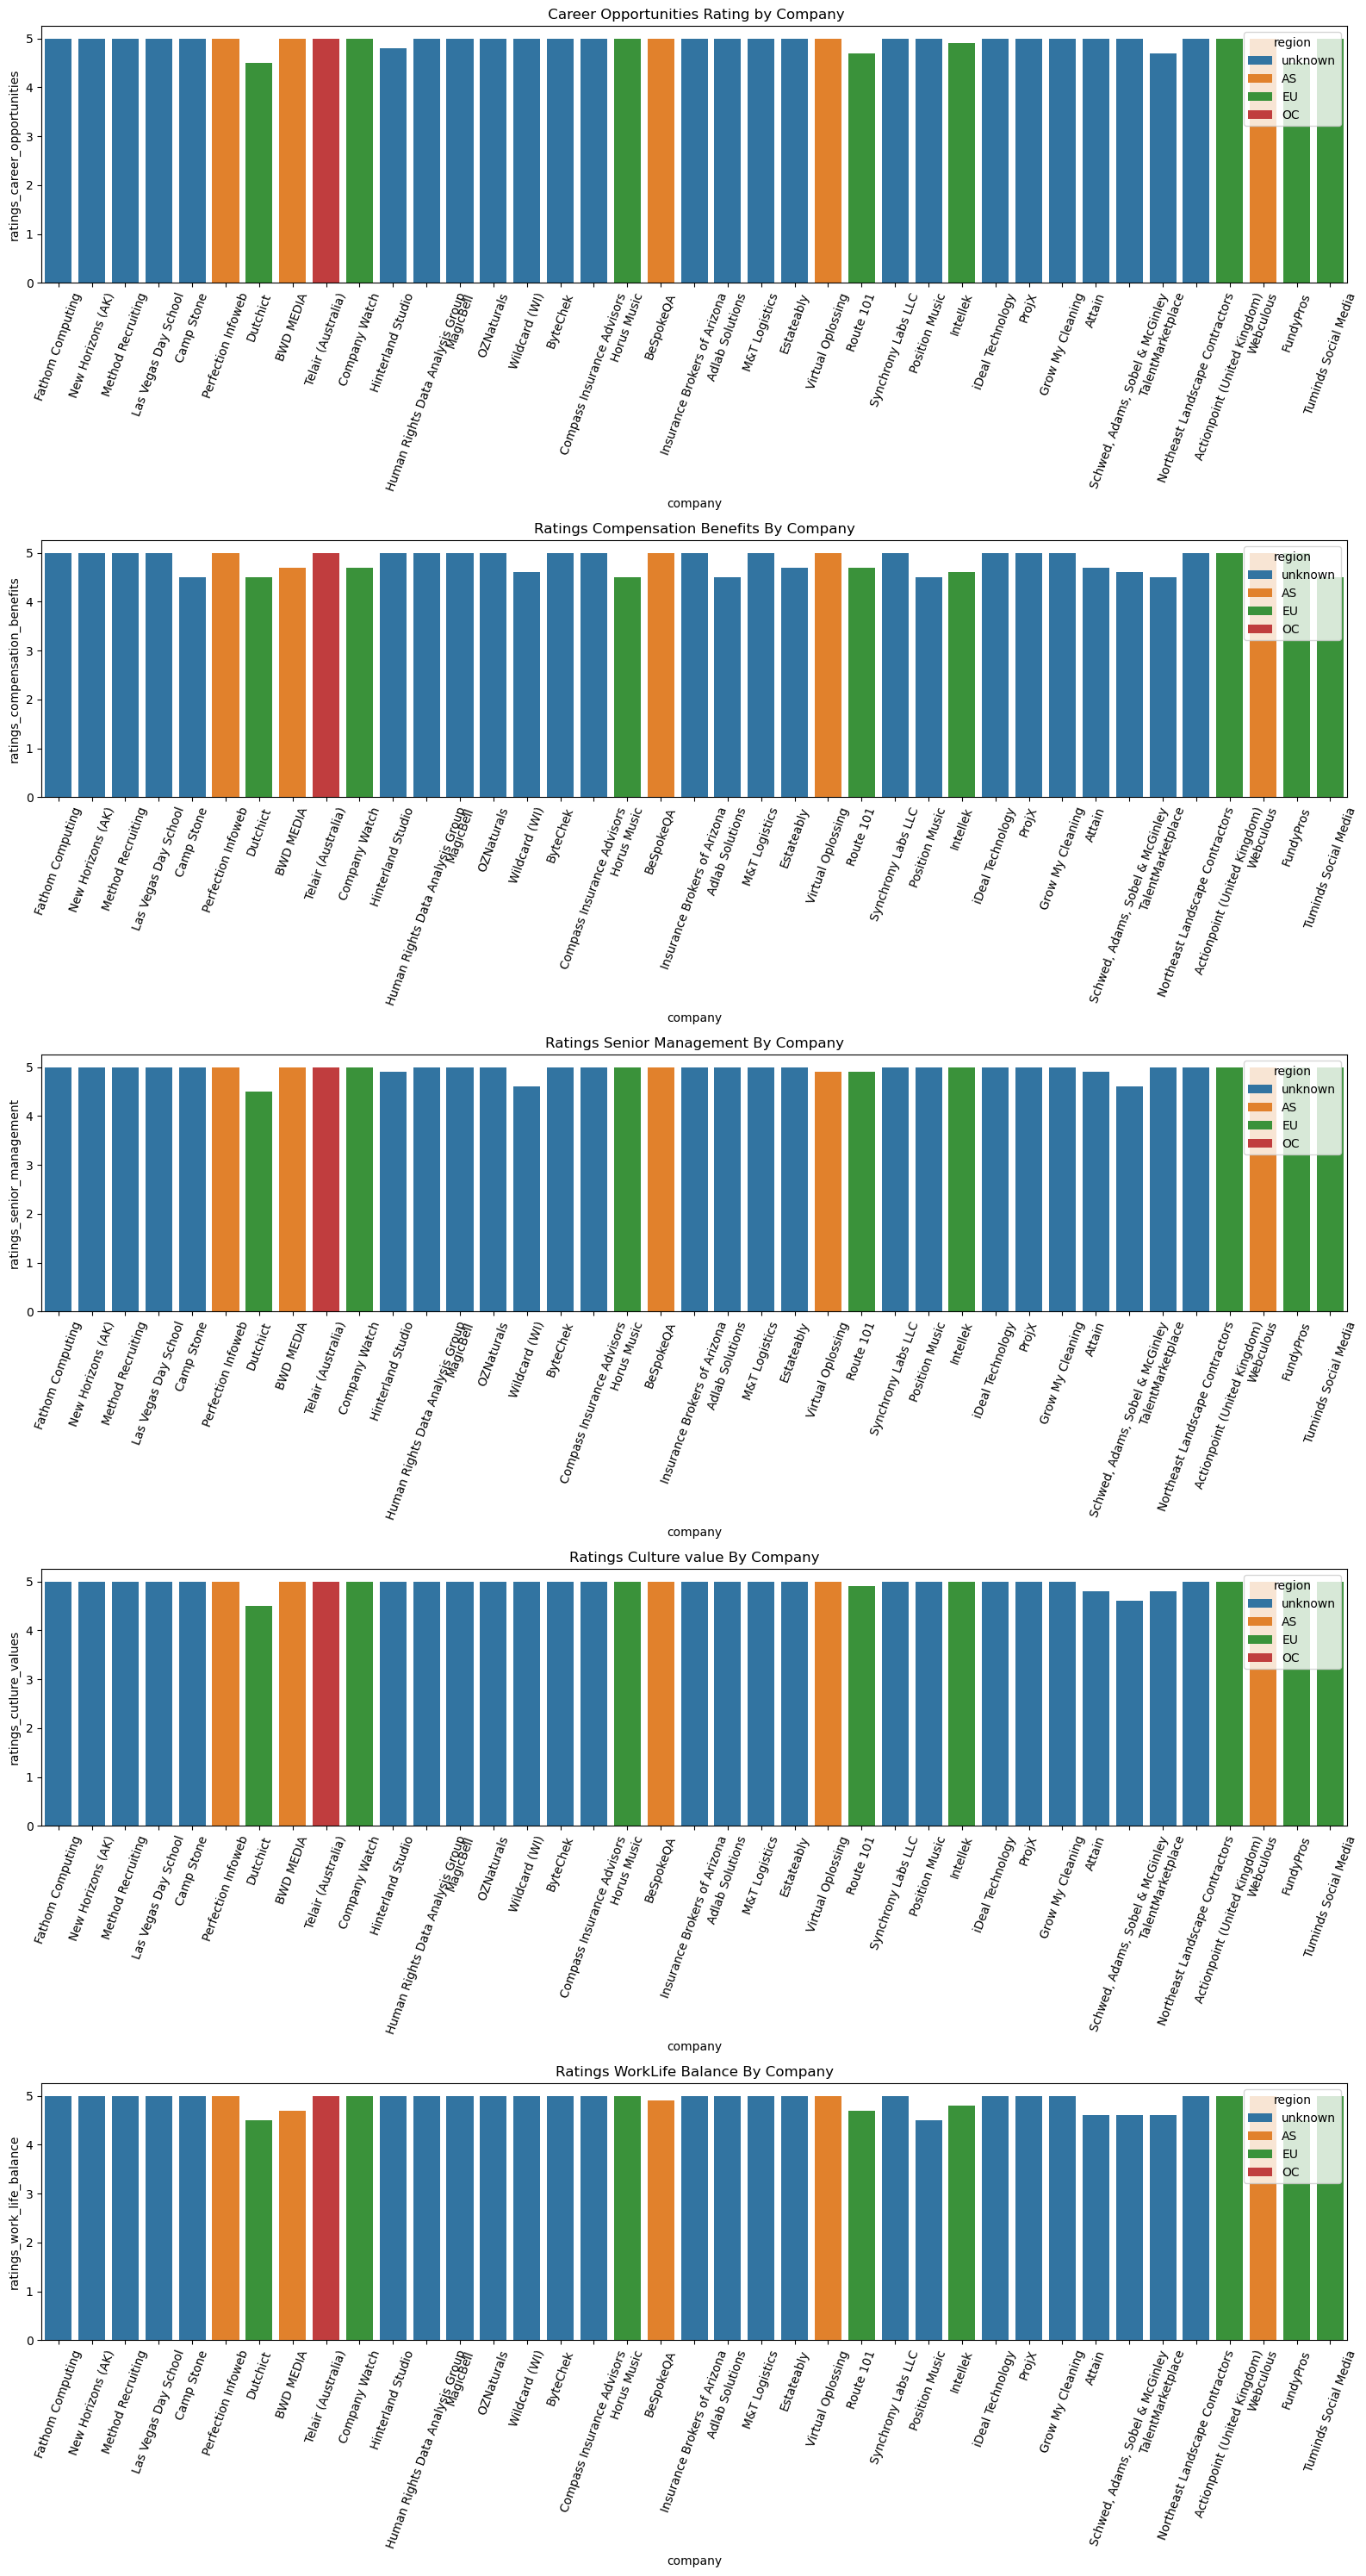

In [40]:
fig = plt.figure(figsize=(16,30))
#for i,col in enumerate(corr_matrix,start=1):
 #   ax = fig.add_subplot(8,1,i)
  #  sb.lineplot(y = dt[col],ax = ax,color='skyblue')
   # plt.title(col)
    #plt.xlabel('Rating')
    #plt.ylabel('Frequency')
#plt.tight_layout()
#plt.show()
fig.add_subplot(511)
sb.barplot(x=company_hig_rating.company,y=company_hig_rating.ratings_career_opportunities,hue=company_hig_rating.region)
plt.title(" Career Opportunities Rating by Company")
plt.xticks(rotation=70)

fig.add_subplot(512)
sb.barplot(x=company_hig_rating.company,y=company_hig_rating.ratings_compensation_benefits,hue=company_hig_rating.region)
plt.title("Ratings Compensation Benefits By Company")
plt.xticks(rotation=70)

fig.add_subplot(513)
sb.barplot(x=company_hig_rating.company,y=company_hig_rating.ratings_senior_management,hue=company_hig_rating.region)
plt.title("Ratings Senior Management By Company")
plt.xticks(rotation=70)

fig.add_subplot(514)
sb.barplot(x=company_hig_rating.company,y=company_hig_rating.ratings_cutlure_values,hue=company_hig_rating.region)
plt.title("Ratings Culture value By Company")
plt.xticks(rotation=70)

fig.add_subplot(515)
sb.barplot(x=company_hig_rating.company,y=company_hig_rating.ratings_work_life_balance,hue=company_hig_rating.region)
plt.title("Ratings WorkLife Balance By Company")
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

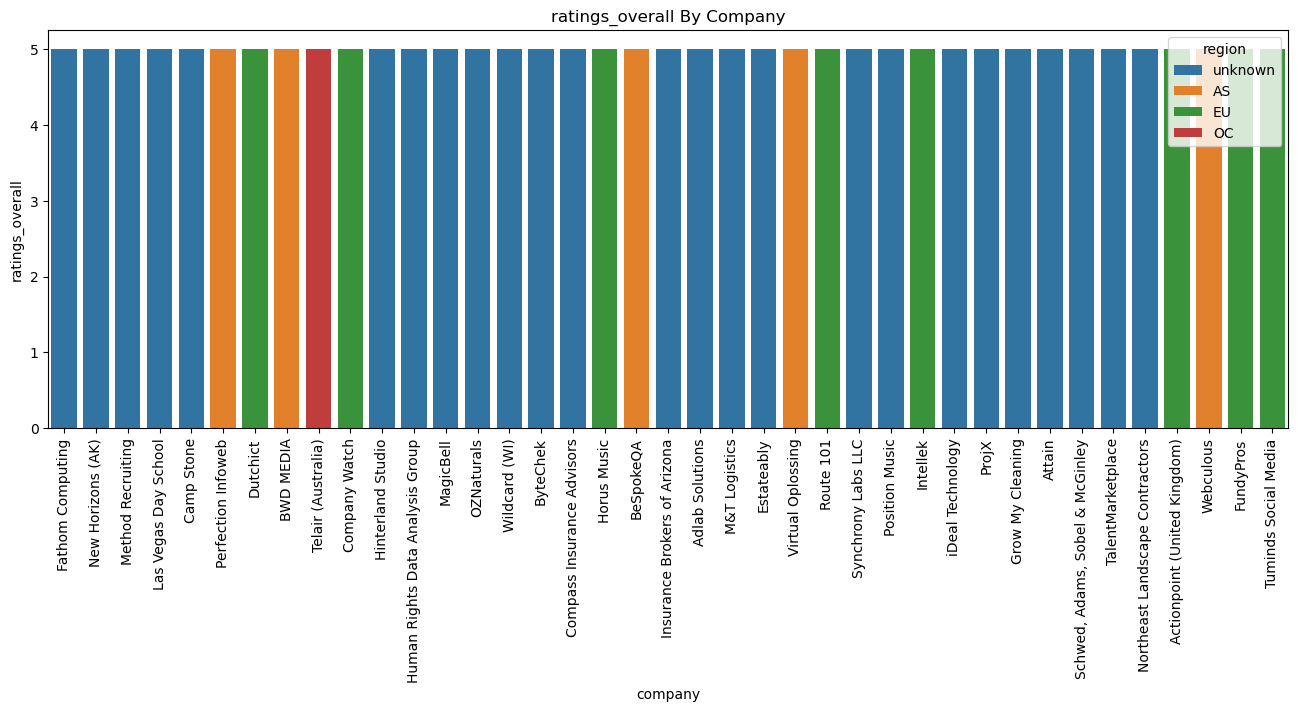

In [41]:
fig = plt.figure(figsize=(16,30))
fig.add_subplot(515)
sb.barplot(x=company_hig_rating.company,y=company_hig_rating.ratings_overall,hue=company_hig_rating.region)
plt.title("ratings_overall By Company")
plt.xticks(rotation=90)
plt.show()

## Mid Rated Company

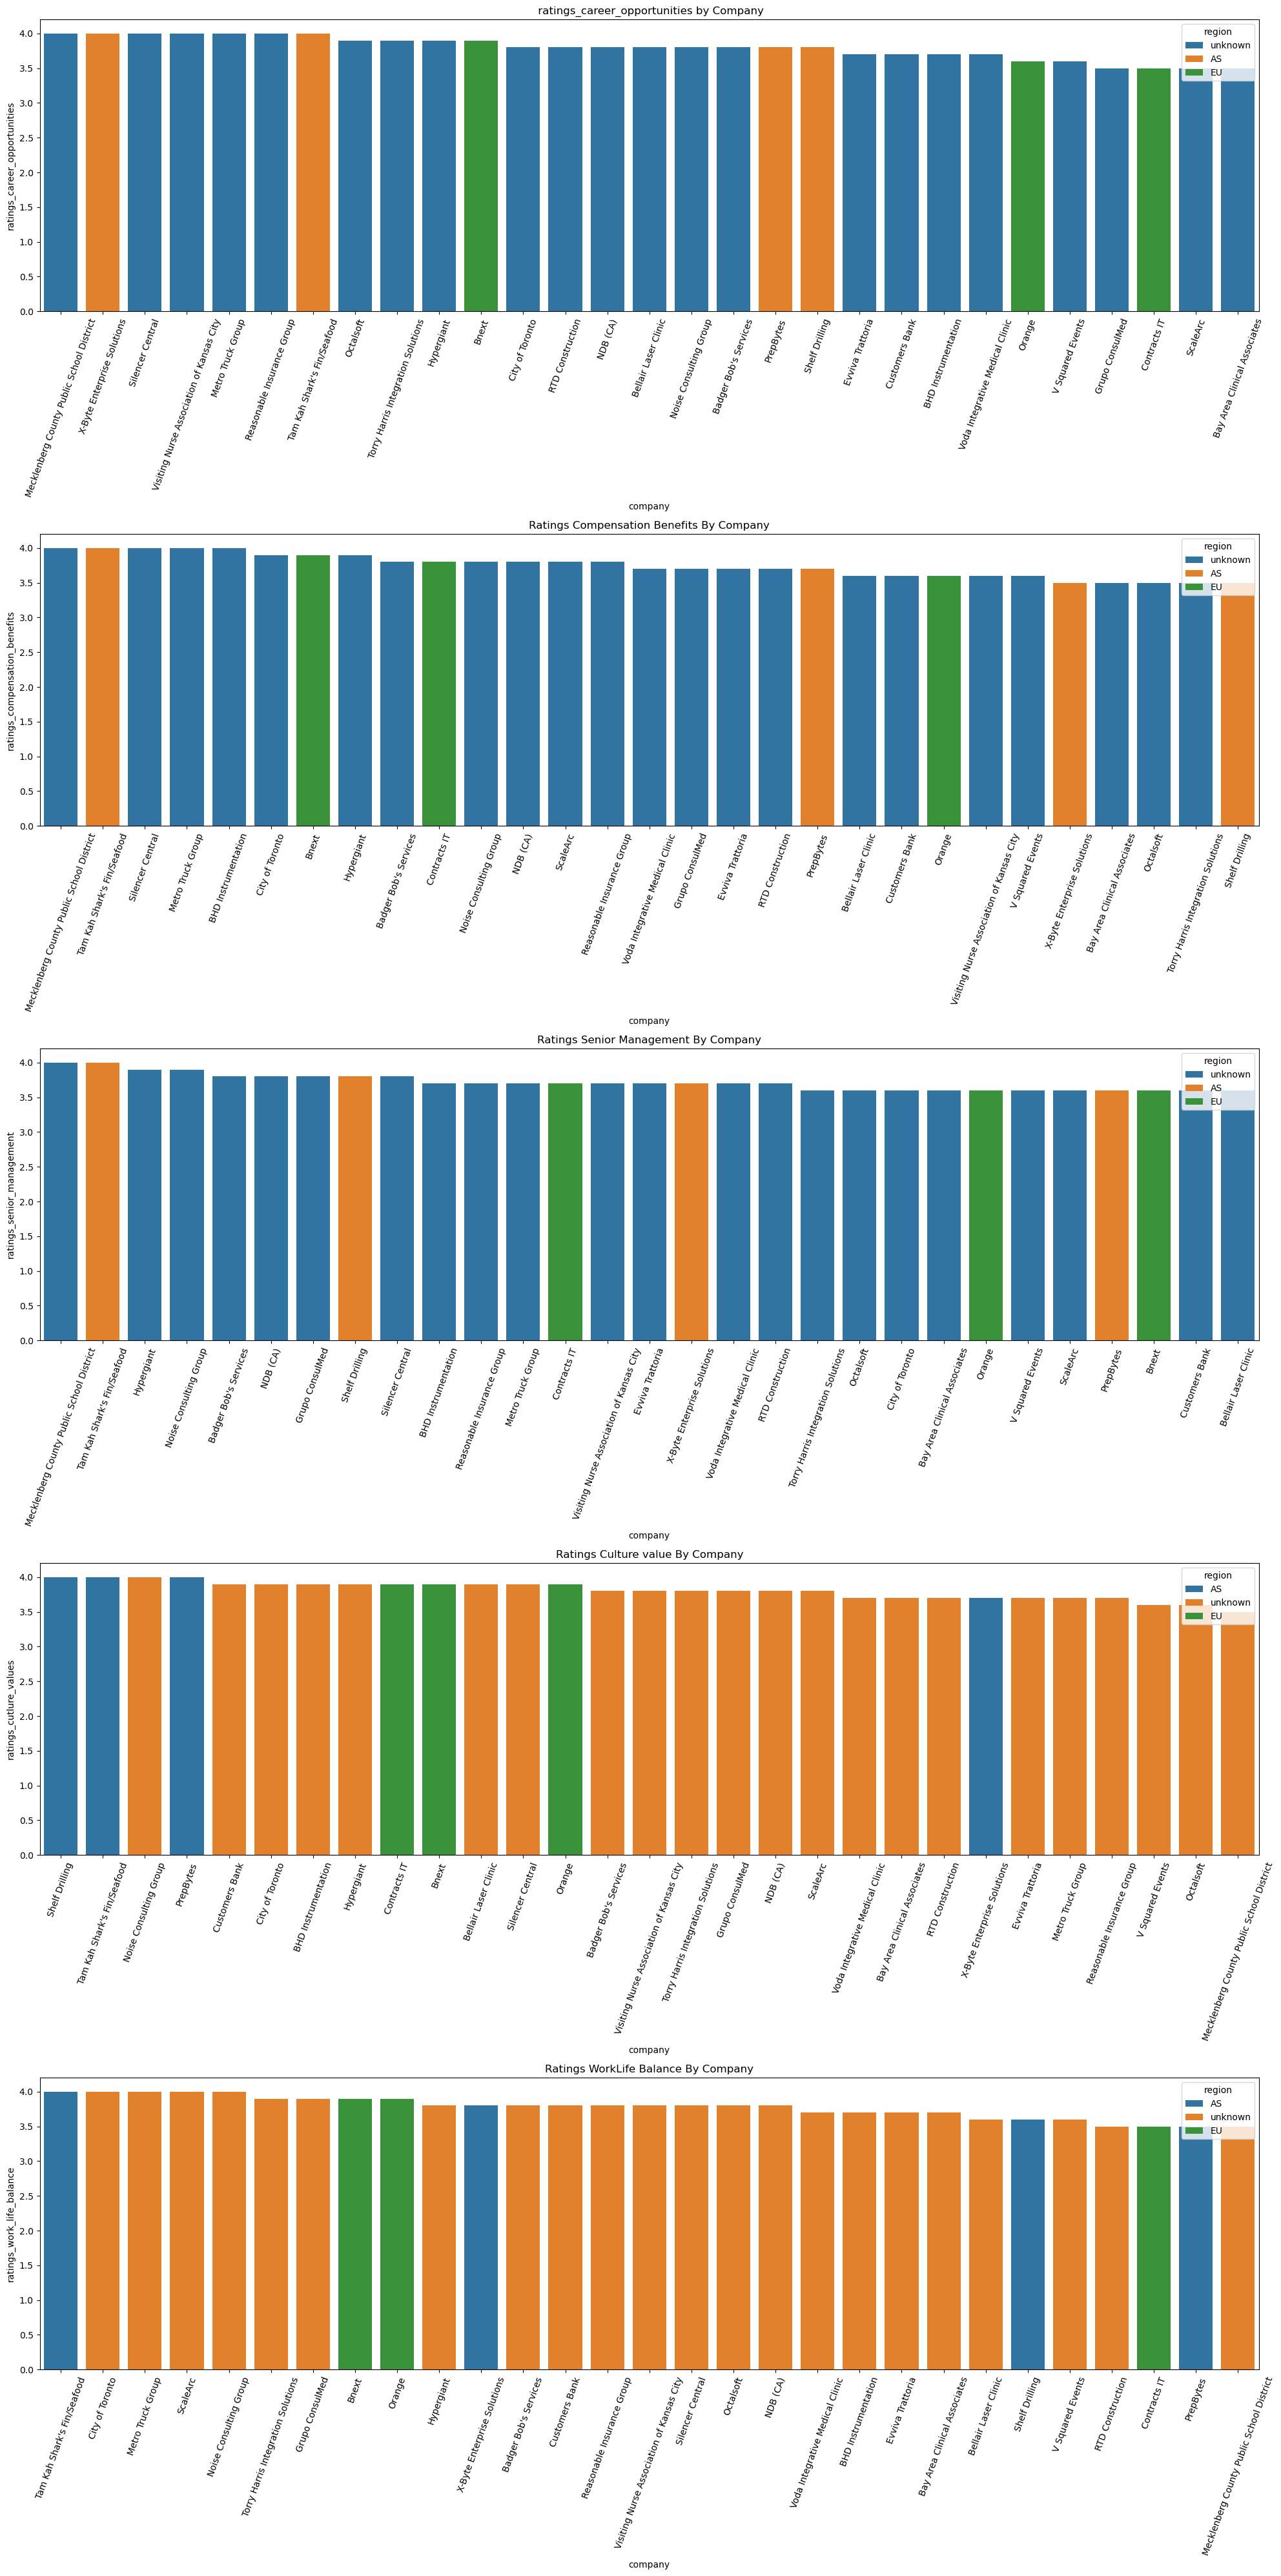

In [42]:

fig = plt.figure(figsize=(20,40))
top_10_df_rco = company_mid_rating.sort_values(by='ratings_career_opportunities', ascending=False).head(30)
fig.add_subplot(511)
sb.barplot(x=top_10_df_rco.company,y=top_10_df_rco.ratings_career_opportunities,hue=top_10_df_rco.region)
plt.title(" ratings_career_opportunities by Company")
plt.xticks(rotation=70)

fig.add_subplot(512)
top_10_df_rcb = company_mid_rating.sort_values(by='ratings_compensation_benefits', ascending=False).head(30)
sb.barplot(x=top_10_df_rcb.company,y=top_10_df_rcb.ratings_compensation_benefits,hue=top_10_df_rcb.region)
plt.title("Ratings Compensation Benefits By Company")
plt.xticks(rotation=70)

fig.add_subplot(513)
top_10_df_rsm = company_mid_rating.sort_values(by='ratings_senior_management', ascending=False).head(30)
sb.barplot(x=top_10_df_rsm.company,y=top_10_df_rsm.ratings_senior_management,hue=top_10_df_rsm.region)
plt.title("Ratings Senior Management By Company")
plt.xticks(rotation=70)

fig.add_subplot(514)
top_10_df_rcv = company_mid_rating.sort_values(by='ratings_cutlure_values', ascending=False).head(30)
sb.barplot(x=top_10_df_rcv.company,y=top_10_df_rcv.ratings_cutlure_values,hue=top_10_df_rcv.region)
plt.title("Ratings Culture value By Company")
plt.xticks(rotation=70)

fig.add_subplot(515)
top_10_df_rwb = company_mid_rating.sort_values(by='ratings_work_life_balance', ascending=False).head(30)
sb.barplot(x=top_10_df_rwb.company,y=top_10_df_rwb.ratings_work_life_balance,hue=top_10_df_rwb.region)
plt.title("Ratings WorkLife Balance By Company")
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

## Low Rated Company

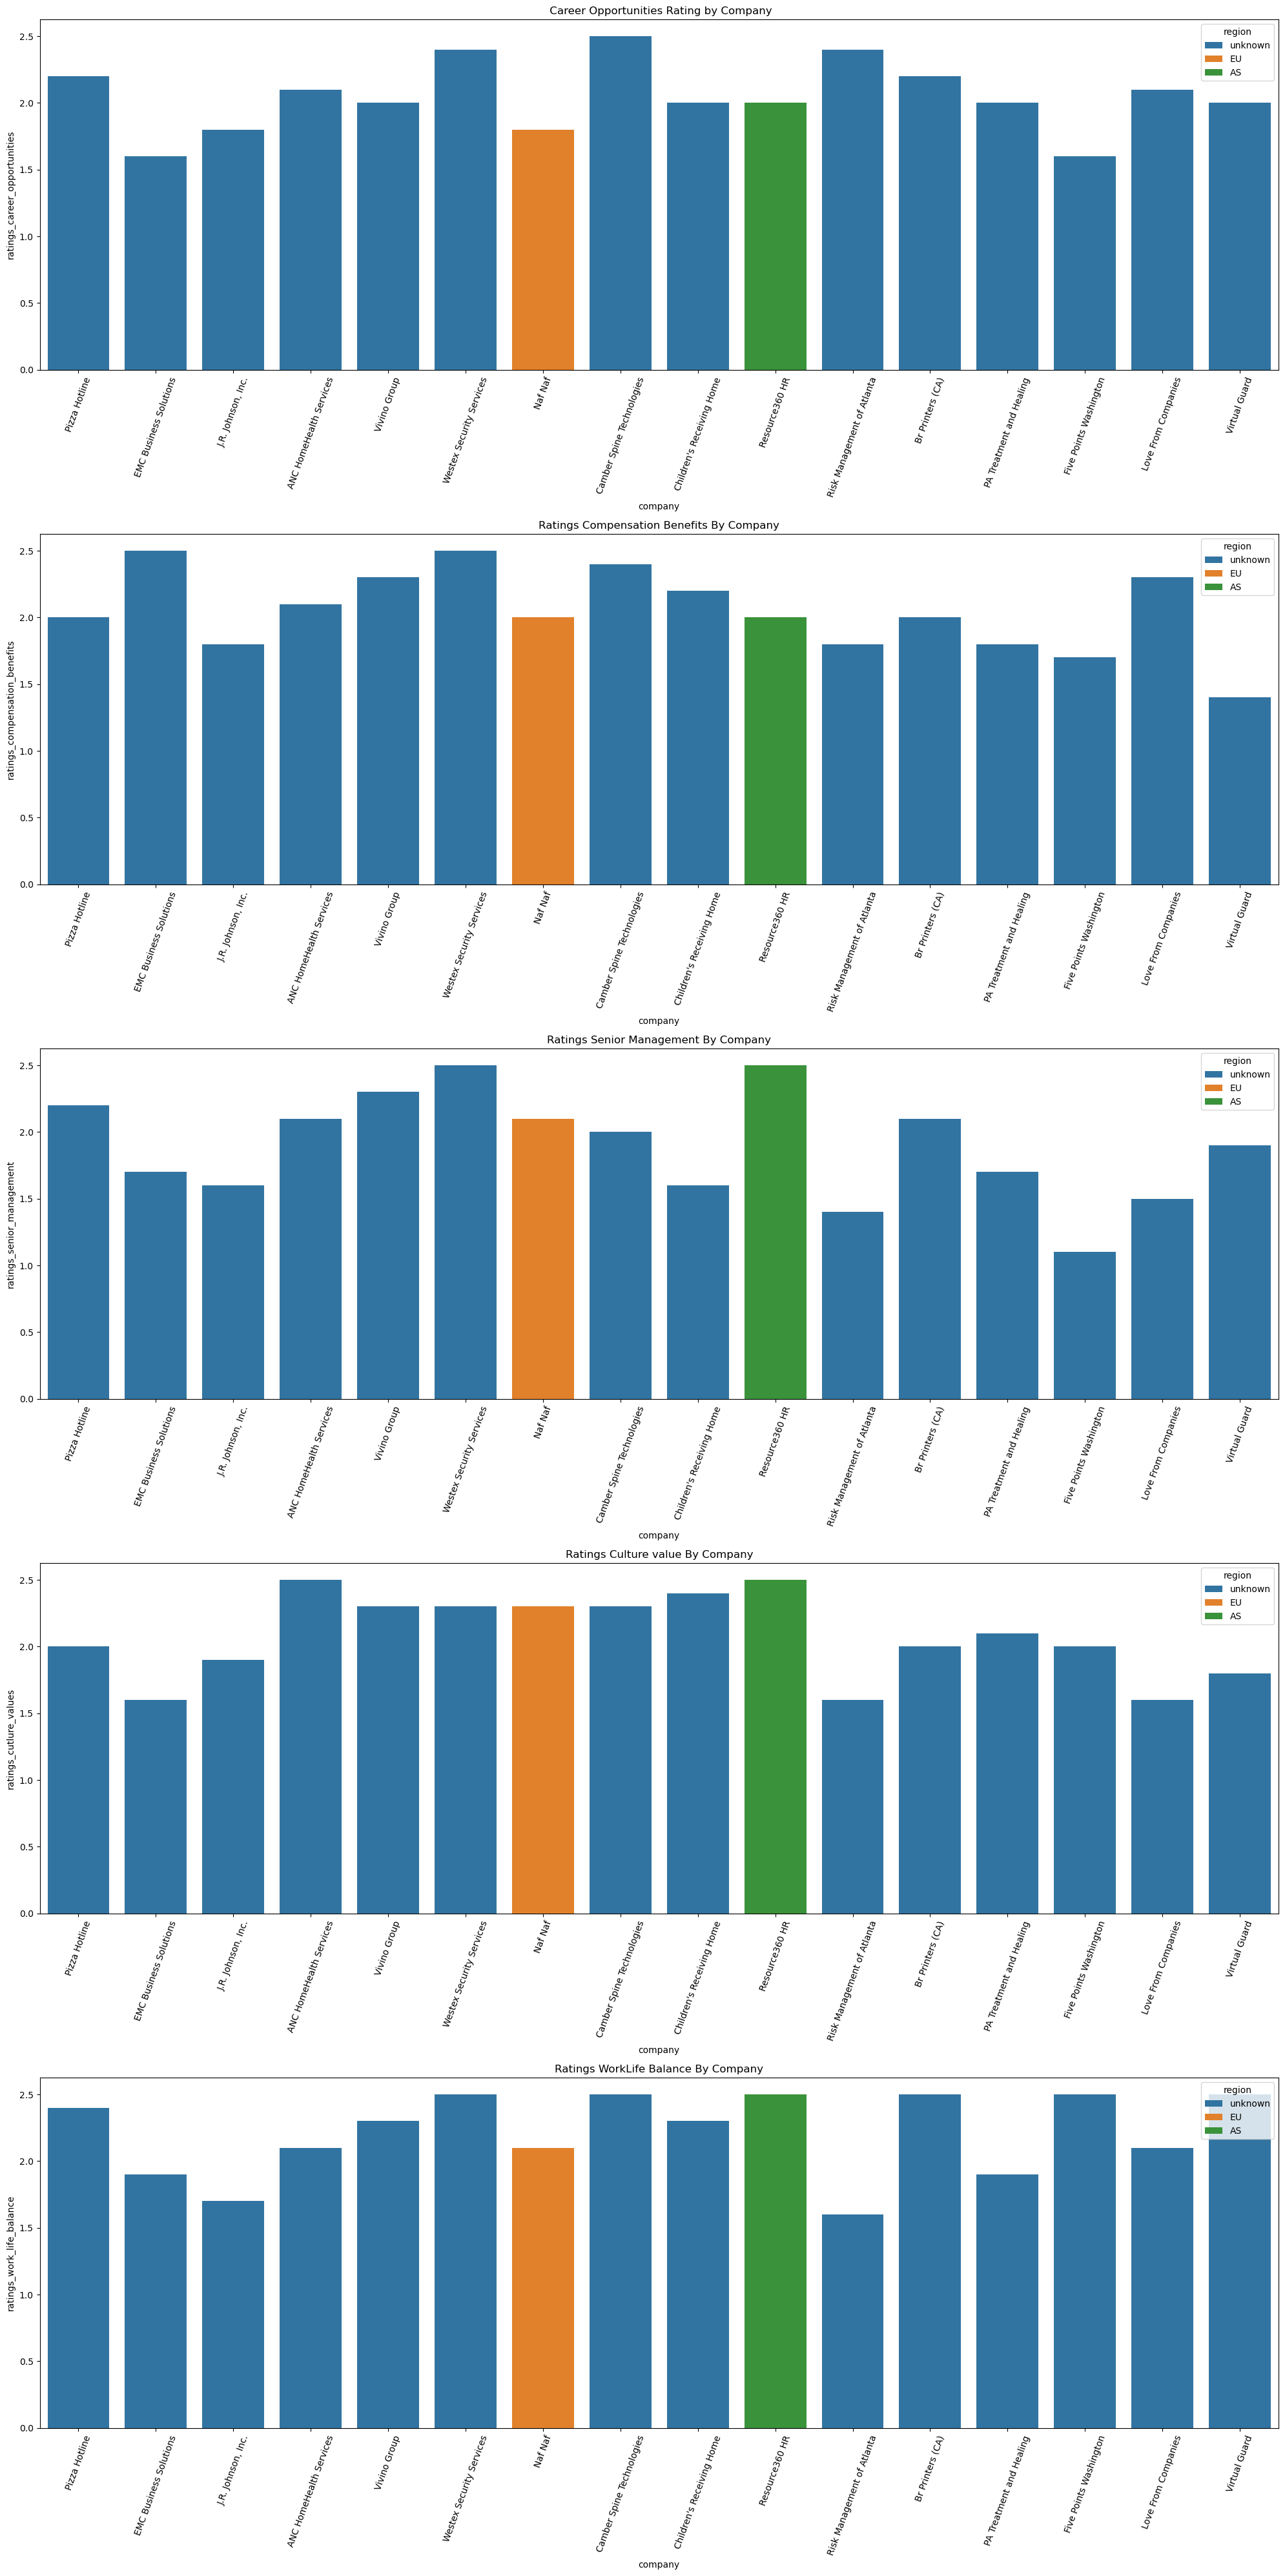

In [43]:
fig = plt.figure(figsize=(20,40))
fig.add_subplot(511)
sb.barplot(x=company_low_rating.company,y=company_low_rating.ratings_career_opportunities,hue=company_low_rating.region)
plt.title(" Career Opportunities Rating by Company")
plt.xticks(rotation=70)

fig.add_subplot(512)
sb.barplot(x=company_low_rating.company,y=company_low_rating.ratings_compensation_benefits,hue=company_low_rating.region)
plt.title("Ratings Compensation Benefits By Company")
plt.xticks(rotation=70)

fig.add_subplot(513)
sb.barplot(x=company_low_rating.company,y=company_low_rating.ratings_senior_management,hue=company_low_rating.region)
plt.title("Ratings Senior Management By Company")
plt.xticks(rotation=70)

fig.add_subplot(514)
sb.barplot(x=company_low_rating.company,y=company_low_rating.ratings_cutlure_values,hue=company_low_rating.region)
plt.title("Ratings Culture value By Company")
plt.xticks(rotation=70)

fig.add_subplot(515)
sb.barplot(x=company_low_rating.company,y=company_low_rating.ratings_work_life_balance,hue=company_low_rating.region)
plt.title("Ratings WorkLife Balance By Company")
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

In [44]:
dt['diversity_inclusion_score'] = pd.to_numeric(dt['diversity_inclusion_score'], errors='coerce')


In [45]:
div_gpby = dt.groupby('company_type')['diversity_inclusion_score'].sum()

In [46]:
div_inclu_Sr = div_gpby.nlargest(30).reset_index()

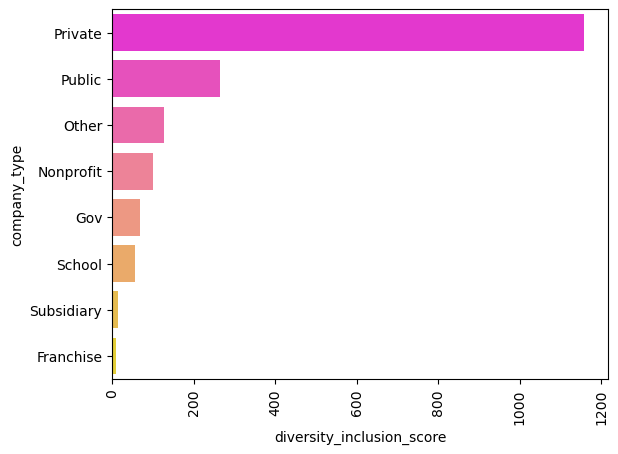

In [47]:
sb.barplot(x=div_inclu_Sr.diversity_inclusion_score,y=div_inclu_Sr.company_type,palette='spring')
plt.xticks(rotation=90)
plt.show()

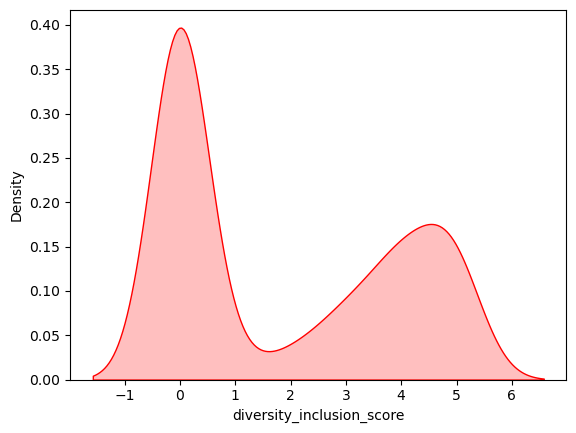

In [48]:
sb.kdeplot(dt.diversity_inclusion_score,shade = True,color='red')
plt.show()

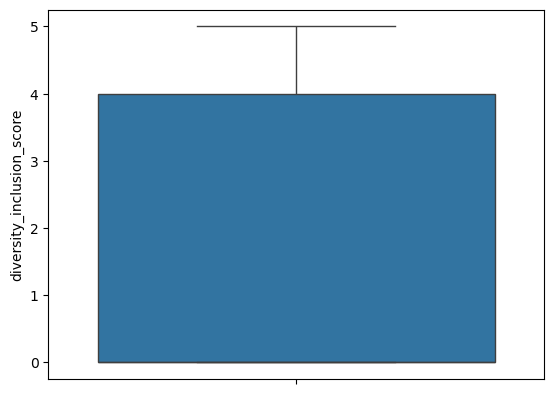

In [49]:
sb.boxplot(dt.diversity_inclusion_score)
plt.show()

In [50]:
dt.diversity_inclusion_score.describe()

count    967.000000
mean       1.864736
std        2.079688
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max        5.000000
Name: diversity_inclusion_score, dtype: float64

In [51]:
hidiv_inclu = dt[(dt.diversity_inclusion_score >= 4)].nlargest(20,'diversity_inclusion_score')

In [52]:
mid_div_inclu = dt[(dt.diversity_inclusion_score <= 3.2)&(dt.diversity_inclusion_score >= 2.5)].nlargest(30,'diversity_inclusion_score')

In [53]:
mid_div_inclu_p = mid_div_inclu[(mid_div_inclu.company_type == 'Private')&(mid_div_inclu.diversity_inclusion_score <= 3.4)]

In [54]:
low_div_inclu = dt[(dt.diversity_inclusion_score < 2)].nsmallest(5,'diversity_inclusion_score').reset_index()

## High Diversity Inclusion Score

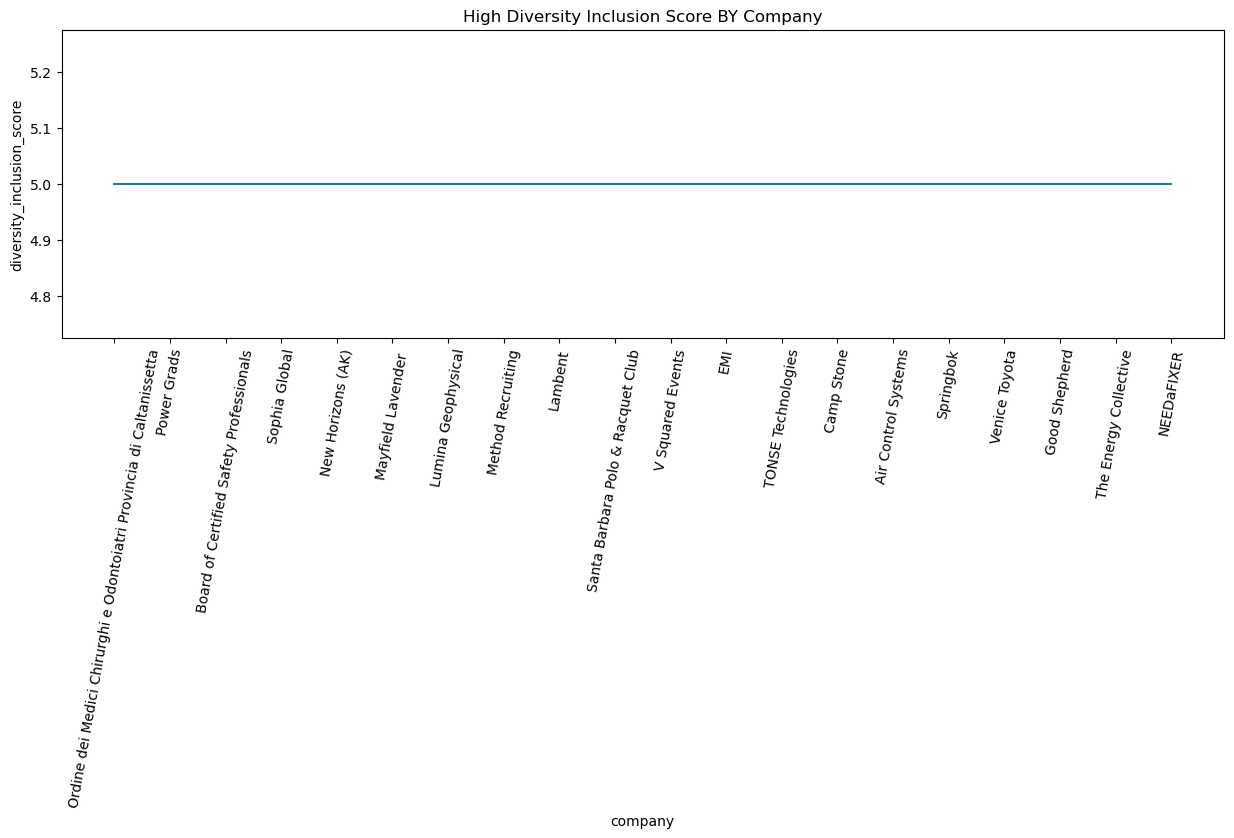

In [55]:
plt.figure(figsize=[15,4])
sb.lineplot(x=hidiv_inclu.company,y=hidiv_inclu.diversity_inclusion_score,palette='hot')
plt.xticks(rotation=80)
plt.title('High Diversity Inclusion Score BY Company')
plt.show()

## Mid Diversity Inclusion Score

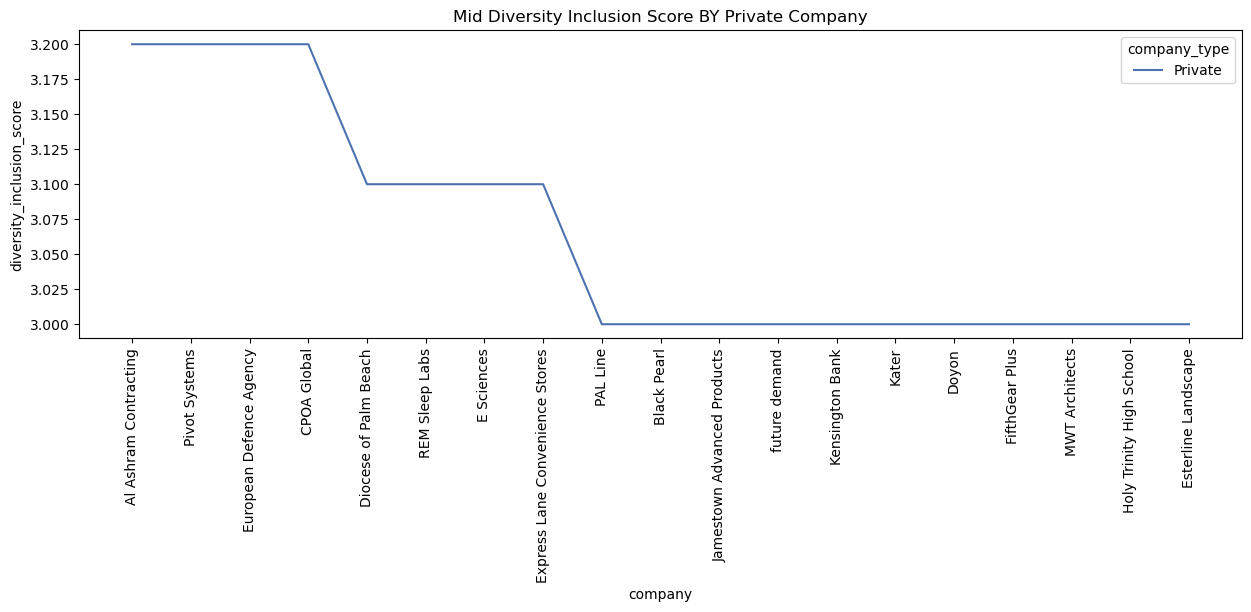

In [56]:
plt.figure(figsize=[15,4])
sb.lineplot(x=mid_div_inclu_p.company,y=mid_div_inclu_p.diversity_inclusion_score,hue=mid_div_inclu_p.company_type,palette='deep')
plt.xticks(rotation=90)
plt.title('Mid Diversity Inclusion Score BY Private Company')
plt.show()

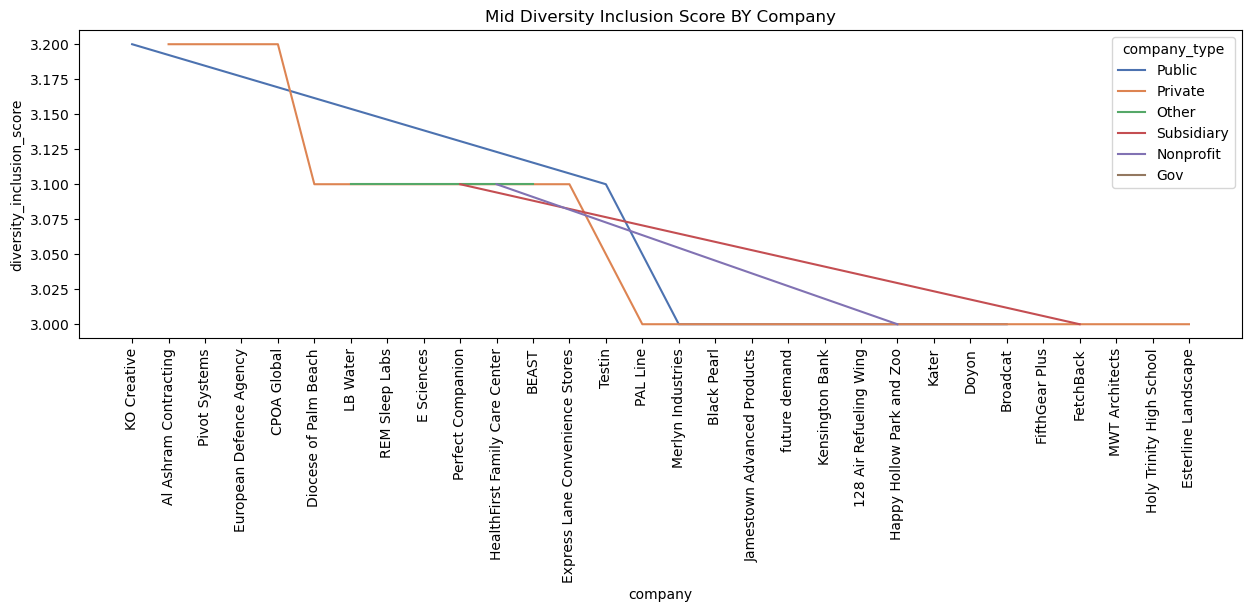

In [57]:
plt.figure(figsize=[15,4])
sb.lineplot(x=mid_div_inclu.company,y=mid_div_inclu.diversity_inclusion_score,hue=mid_div_inclu.company_type,palette='deep')
plt.xticks(rotation=90)
plt.title('Mid Diversity Inclusion Score BY Company')
plt.show()

## Low Diversity Inclusion Score

In [58]:
l = low_div_inclu.groupby('company')['diversity_inclusion_score'].mean()

In [59]:
l

company
Ascens Services     0.0
Avant Gardner       0.0
Brightlands         0.0
Fathom Computing    0.0
Jeanswest           0.0
Name: diversity_inclusion_score, dtype: float64

## Impact of Company Type

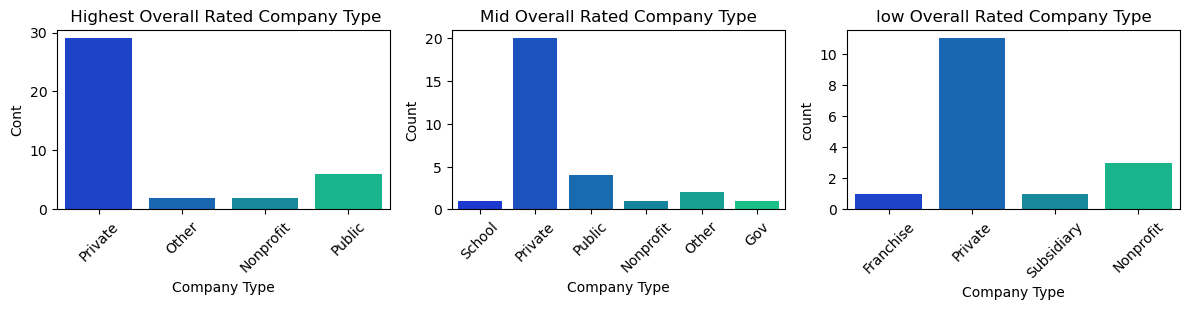

In [60]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(331)
sb.countplot(x=company_hig_rating.company_type,palette="winter")
plt.title(" Highest Overall Rated Company Type")
plt.ylabel("Cont")
plt.xlabel("Company Type")
plt.xticks(rotation=45)

fig.add_subplot(332)
sb.countplot(x=company_mid_rating.company_type,palette="winter")
plt.title("Mid Overall Rated Company Type")
plt.ylabel("Count")
plt.xlabel("Company Type")
plt.xticks(rotation=45)

fig.add_subplot(333)
sb.countplot(x=company_low_rating.company_type,palette="winter")
plt.title("low Overall Rated Company Type")
plt.xlabel("Company Type")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

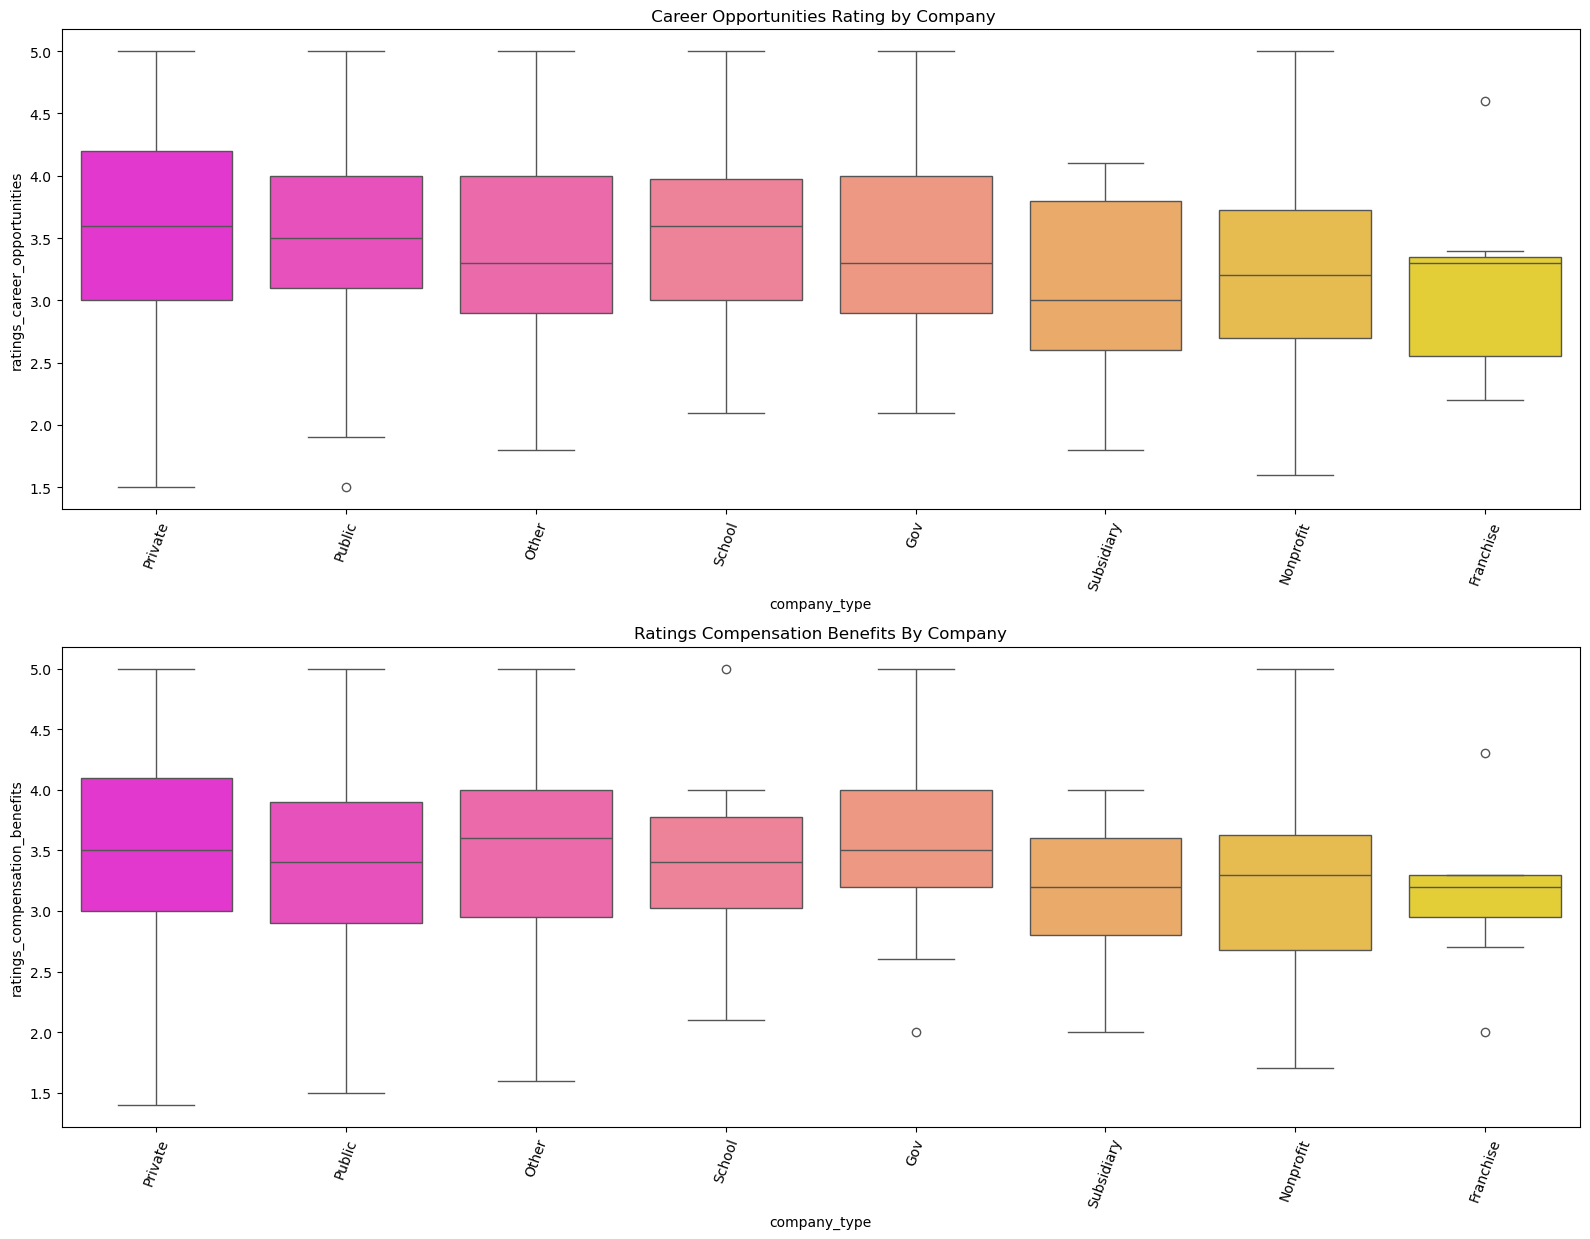

In [61]:
fig = plt.figure(figsize=(16,30))
fig.add_subplot(511)
sb.boxplot(x=dt.company_type,y=dt.ratings_career_opportunities,palette='spring')
plt.title(" Career Opportunities Rating by Company")
plt.xticks(rotation=70)

fig.add_subplot(512)
sb.boxplot(x=dt.company_type,y=dt.ratings_compensation_benefits,palette='spring')
plt.title("Ratings Compensation Benefits By Company")
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

## Salary and Compensation Analysis

In [62]:
s1 = dt[['salaries_count','ratings_compensation_benefits','ratings_overall']].corr()

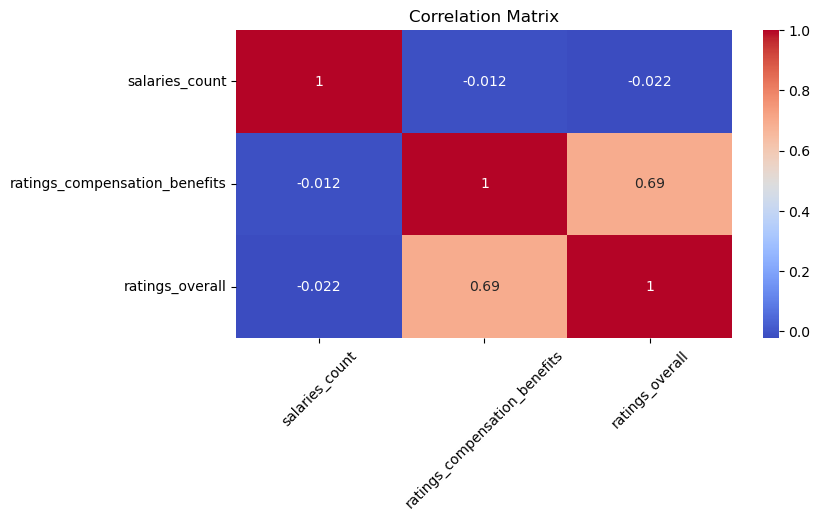

In [63]:
plt.figure(figsize=(8,4))
sb.heatmap(s1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

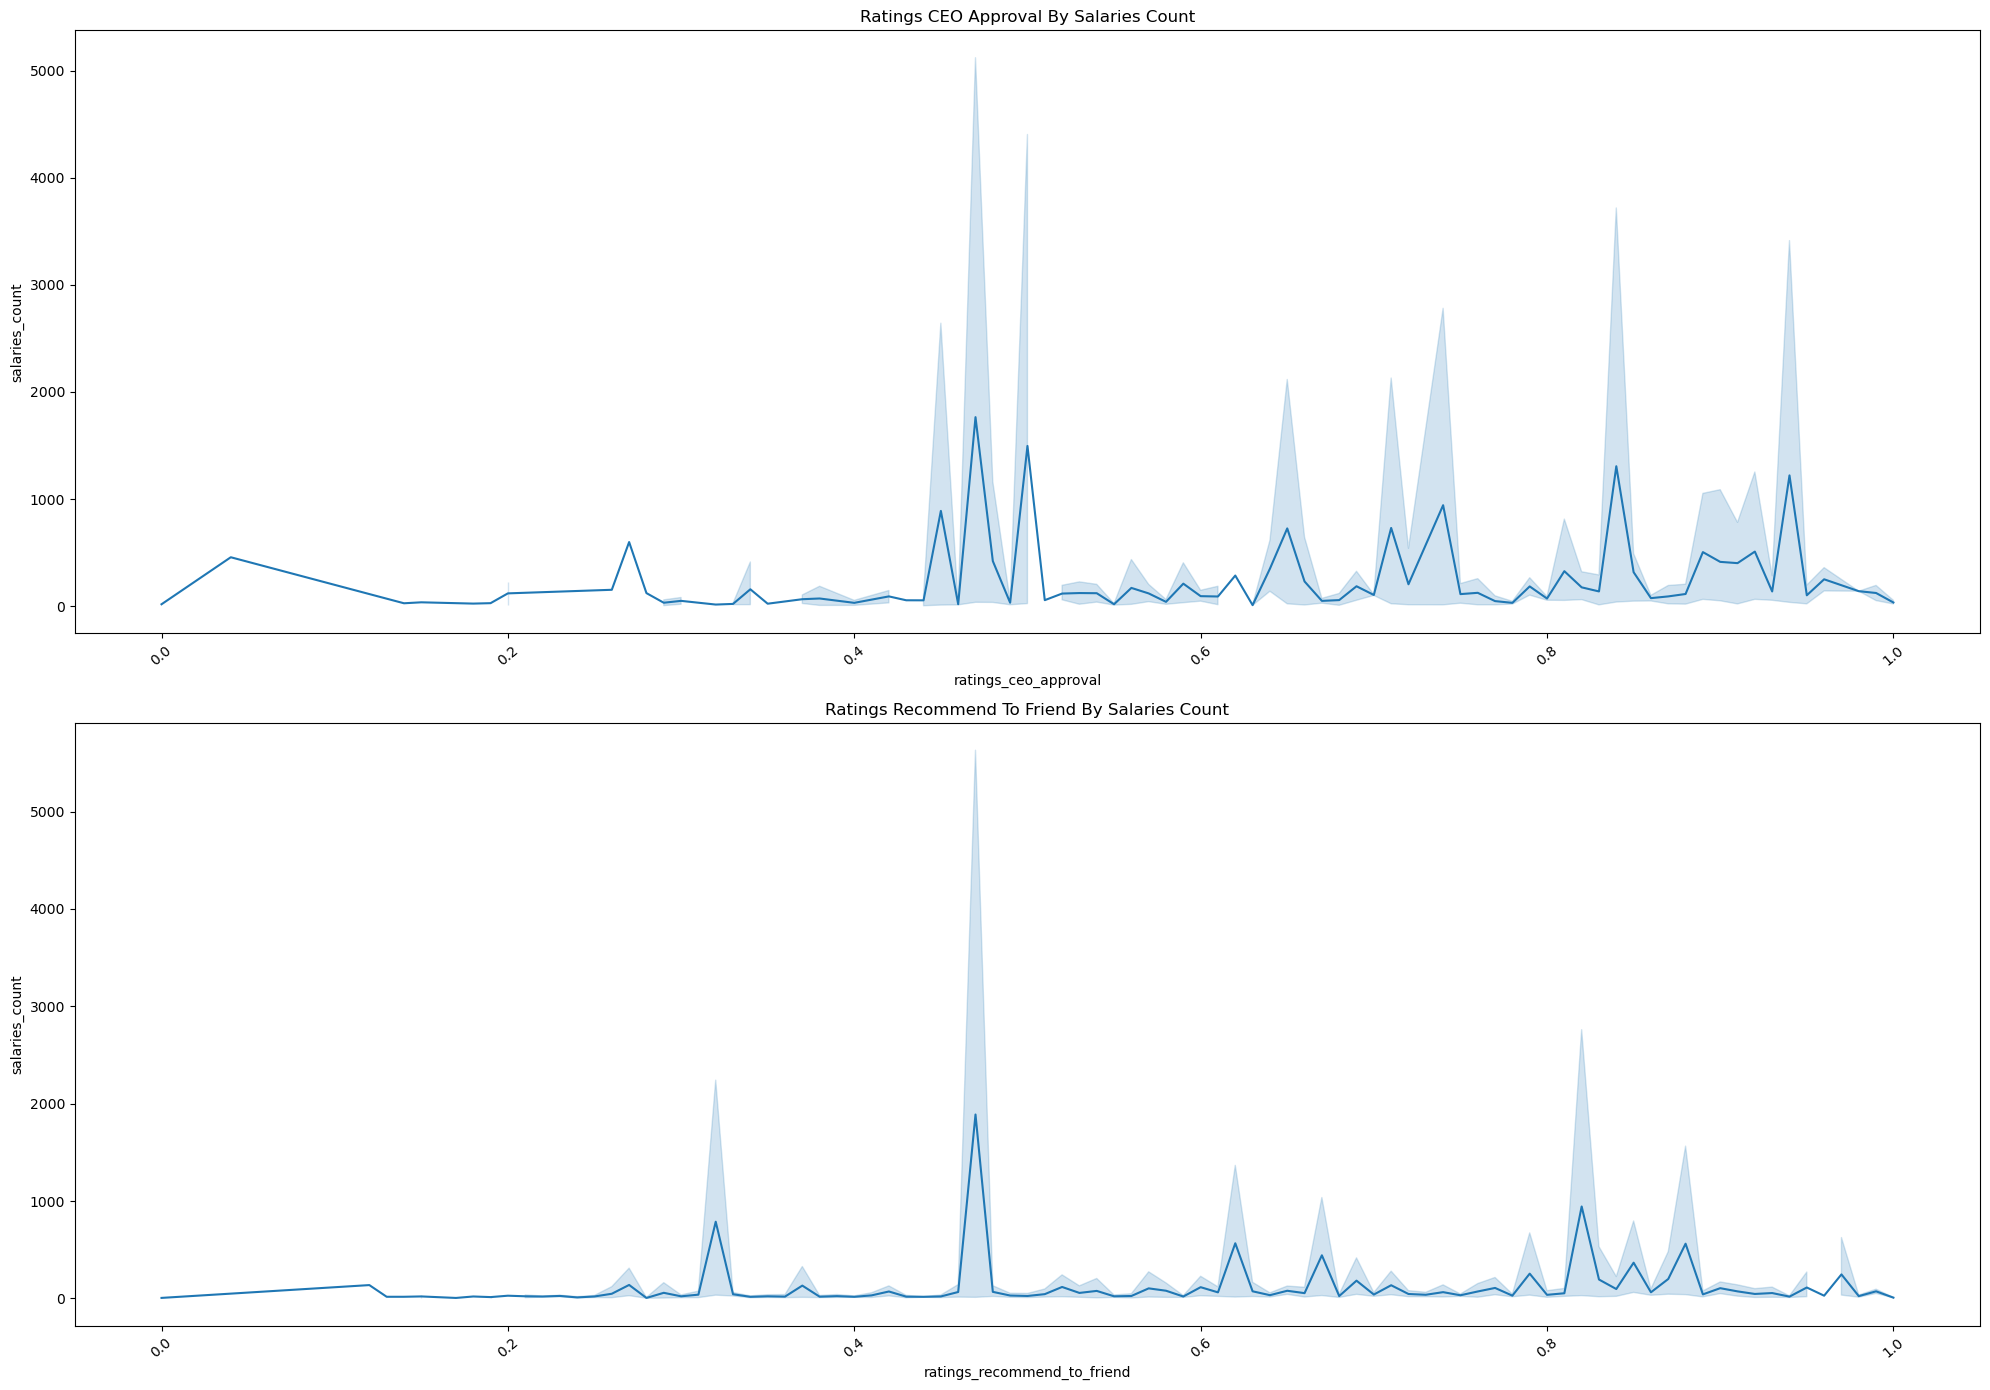

In [64]:
fig = plt.figure(figsize=[20,14])
fig.add_subplot(211)
sb.lineplot(x=dt.ratings_ceo_approval,y=dt.salaries_count)
plt.xticks(rotation=40)
plt.title('Ratings CEO Approval By Salaries Count')

fig.add_subplot(212)
sb.lineplot(x=dt.ratings_recommend_to_friend,y=dt.salaries_count)
plt.xticks(rotation=40)
plt.tight_layout()
plt.title('Ratings Recommend To Friend By Salaries Count')
plt.tight_layout()
plt.show()